# Git

In [1]:
token = "..."

!git config --global user.email "..."
!git config --global user.name "utkuden"
!git config --list

!git clone https://{token}@github.com/"utkuden"/"DI725_assignment"

filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
filter.lfs.clean=git-lfs clean -- %f
user.email=u.deniz.dincturk@gmail.com
user.name=utkuden
Cloning into 'DI725_assignment'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 350 (delta 136), reused 277 (delta 108), pack-reused 0 (from 0)
Receiving objects: 100% (350/350), 5.91 MiB | 6.88 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p DI725_assignment/assignment_2/data/auair2019annotations

!unzip -q "/content/drive/MyDrive/assignment2_data/auair2019annotations.zip" \
      -d  "DI725_assignment/assignment_2/data/auair2019annotations"

!unzip -q "/content/drive/MyDrive/assignment2_data/auair2019data.zip" \
      -d  "DI725_assignment/assignment_2/data/auair2019data"

In [4]:
cd DI725_assignment/assignment_2

/content/DI725_assignment/assignment_2


# Data Exploration

In [5]:
from auairtools.auair import AUAIR # originated from https://github.com/sunw71/auairdataset

# Paths to annotation file and source data.
annotFile = '/content/DI725_assignment/assignment_2/data/auair2019annotations/annotations.json'
dataDir = '/content/DI725_assignment/assignment_2/data/auair2019data/images'

# Create a AUAIR object.
auairdataset = AUAIR(annotation_file=annotFile, data_folder = dataDir)

Loading annotations into memory...
Done (t=0.89s)
32823 annotated frames are found.
Checking images...
32823 image files found.


In [6]:
# Annotation by given index
ret_index = 0
print(f"Get image and annotation with index {ret_index}")
img, ann = auairdataset.get_data_by_index(ret_index)
print('Image shape: ', img.shape)
print('Annotation: ', ann)
print("Done")

Get image and annotation with index 0
Image shape:  (1080, 1920, 3)
Annotation:  {'image_name': 'frame_20190829091111_x_0001973.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 394400.0}, 'longtitude': 10.18798203255313, 'latitude': 56.20630134795274, 'altitude': 19921.6, 'linear_x': 0.03130074199289083, 'linear_y': 0.028357808757573367, 'linear_z': 0.0744575835764408, 'angle_phi': -0.06713105738162994, 'angle_theta': 0.06894744634628296, 'angle_psi': 1.1161083340644837, 'bbox': [{'top': 163, 'left': 1098, 'height': 185, 'width': 420, 'class': 1}, {'top': 421, 'left': 1128, 'height': 176, 'width': 393, 'class': 1}, {'top': 927, 'left': 1703, 'height': 153, 'width': 183, 'class': 0}]}
Done


In [7]:
# Annotation by given name
ret_name = "frame_20190829091111_x_0003112.jpg"
print("Get image and annotation with name %s" %ret_name)
img, ann = auairdataset.get_data_by_name(ret_name)
print('Image shape: ', img.shape)
print('Annotation: ', ann)
print("Done")

Get image and annotation with name frame_20190829091111_x_0003112.jpg
Image shape:  (1080, 1920, 3)
Annotation:  {'image_name': 'frame_20190829091111_x_0003112.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 622200.0}, 'longtitude': 10.188010004293114, 'latitude': 56.20623481986304, 'altitude': 20594.0, 'linear_x': 0.011099261534400284, 'linear_y': -0.018080245517194272, 'linear_z': -0.053656487911939624, 'angle_phi': 0.017836384102702142, 'angle_theta': 0.0729873612523079, 'angle_psi': 1.1149127244949342, 'bbox': [{'top': 533, 'left': 1086, 'height': 69, 'width': 87, 'class': 0}, {'top': 308, 'left': 548, 'height': 206, 'width': 379, 'class': 1}, {'top': 81, 'left': 566, 'height': 199, 'width': 358, 'class': 1}]}
Done


In [8]:
# IXs by object categories
ret_cat = 5
print("Get index by category ids %s" %ret_cat)
indices = auairdataset.get_index_by_catId(ret_cat)
print('Indices (first 3 samples for sake of space): ', indices[:3])
for i in indices[:3]:
    ann = auairdataset.get_data_by_index(i, ret_img=False)
    print('Image name: ', ann['image_name'])
    print('Annotation: ', ann)
print("Done")

Get index by category ids 5
Indices (first 3 samples for sake of space):  [22, 606, 1107]
Image name:  frame_20190829091111_x_0002386.jpg
Annotation:  {'image_name': 'frame_20190829091111_x_0002386.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 477000.0}, 'longtitude': 10.187947599327122, 'latitude': 56.20629928130065, 'altitude': 21630.6, 'linear_x': -0.07767375335097312, 'linear_y': -0.5670674532651901, 'linear_z': 0.08399761170148849, 'angle_phi': -0.0974538967013359, 'angle_theta': 0.34072184562683105, 'angle_psi': 1.1196179866790772, 'bbox': [{'top': 293, 'left': 1182, 'height': 158, 'width': 307, 'class': 1}, {'top': 81, 'left': 1177, 'height': 170, 'width': 307, 'class': 1}, {'top': 839, 'left': 1688, 'height': 134, 'width': 173, 'class': 5}]}
Image name:  frame_20190829091111_x_0003619.jpg
Annotation:  {'image_name': 'frame_20190829091111_x_0003619.jpg', 'im

In [9]:
# IXs of images captured in certain altitudes
ret_alt = 20000 # 20000 mm -> 20 meters
print("Get index by altitude (mm) %s:" %ret_alt)
indices = auairdataset.get_index_by_alt(ret_alt)
print('Indices: ', indices[:3])
for i in indices[:3]:
    ann = auairdataset.get_data_by_index(i, ret_img=False)
    print('Image name: ', ann['image_name'])
    print('Annotation: ', ann)
print("Done")

Get index by altitude (mm) 20000:
Indices:  [0, 12, 113]
Image name:  frame_20190829091111_x_0001973.jpg
Annotation:  {'image_name': 'frame_20190829091111_x_0001973.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 394400.0}, 'longtitude': 10.18798203255313, 'latitude': 56.20630134795274, 'altitude': 19921.6, 'linear_x': 0.03130074199289083, 'linear_y': 0.028357808757573367, 'linear_z': 0.0744575835764408, 'angle_phi': -0.06713105738162994, 'angle_theta': 0.06894744634628296, 'angle_psi': 1.1161083340644837, 'bbox': [{'top': 163, 'left': 1098, 'height': 185, 'width': 420, 'class': 1}, {'top': 421, 'left': 1128, 'height': 176, 'width': 393, 'class': 1}, {'top': 927, 'left': 1703, 'height': 153, 'width': 183, 'class': 0}]}
Image name:  frame_20190829091111_x_0001869.jpg
Annotation:  {'image_name': 'frame_20190829091111_x_0001869.jpg', 'image_width:': 1920.0, 'image_heigh

In [10]:
from google.colab.patches import cv2_imshow
import cv2

def display_image(id_or_name):
        """Display image which has given name or id.

        Args:
            id_or_name (int or name): Id (index) or name of the image.
        """

        if type(id_or_name)==int:
            img, ann =  auairdataset.get_data_by_index(id_or_name)
            # cv2_imshow("Name: "+ann['image_name']+', Altitude: '+str(ann['altitude']), img)
            cv2_imshow(img)
        else:
            img, ann =  auairdataset.get_data_by_name(id_or_name)
            # cv2_imshow("Name: "+ann['image_name']+', Altitude: '+str(ann['altitude']), img)
            cv2_imshow(img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()


def display_bboxes(id_or_name):
    """Display image with object bounding boxes which has given name or id.

    Args:
        id_or_name (int or name): Id (index) or name of the image.
    """

    if type(id_or_name)==int:
        img, ann =  auairdataset.get_data_by_index(id_or_name)
    else:
        img, ann =  auairdataset.get_data_by_name(id_or_name)

    for bbox in ann['bbox']:
        x = bbox['left']
        y = bbox['top']
        w = bbox['width']
        h = bbox['height']
        label = auairdataset.categories[bbox['class']]
        cv2.putText(img, label, (x, y+25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), thickness = 2, lineType=cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)

    # cv2.imshow("Name: "+ann['image_name']+', Altitude: '+str(ann['altitude']), img)
    cv2_imshow(img)
    # cv2.waitKey()
    # cv2.destroyAllWindows()



Display image which has index 7:


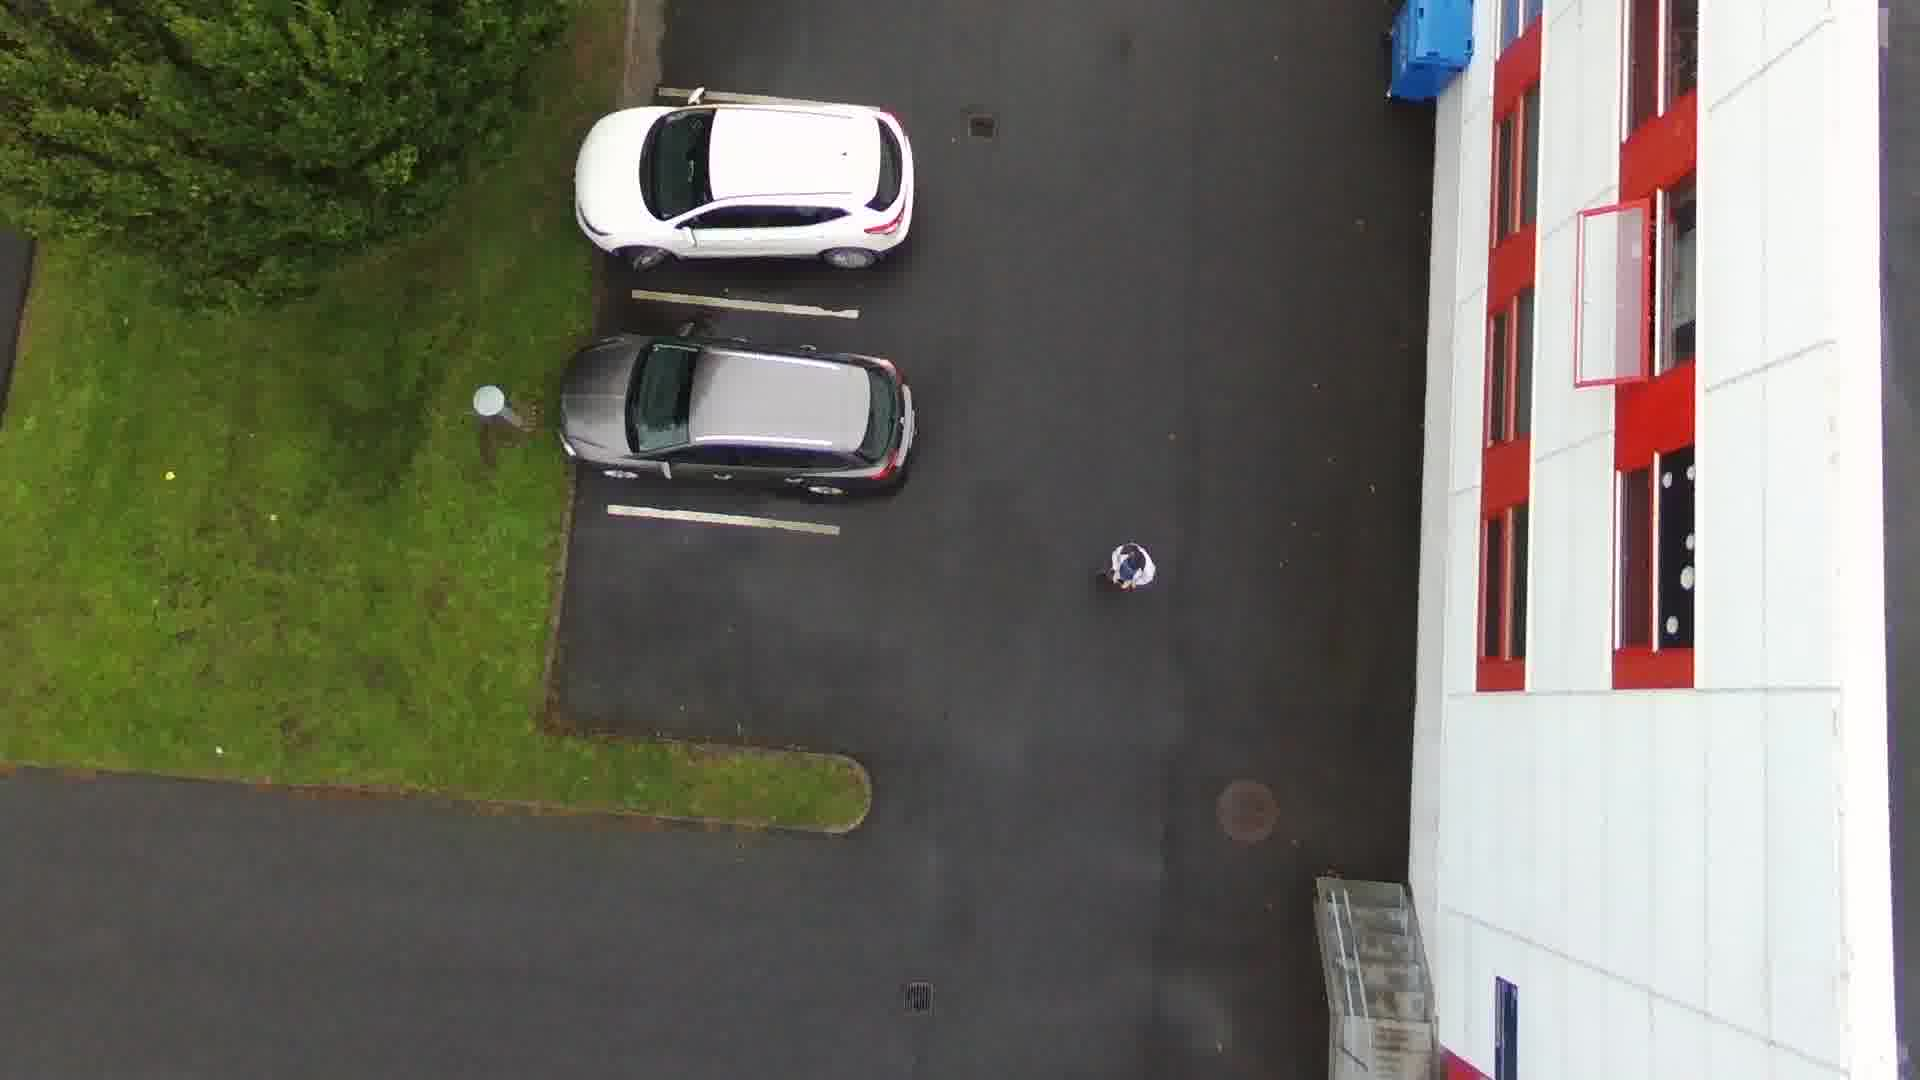

Display image which has name frame_20190829091111_x_0003112.jpg:


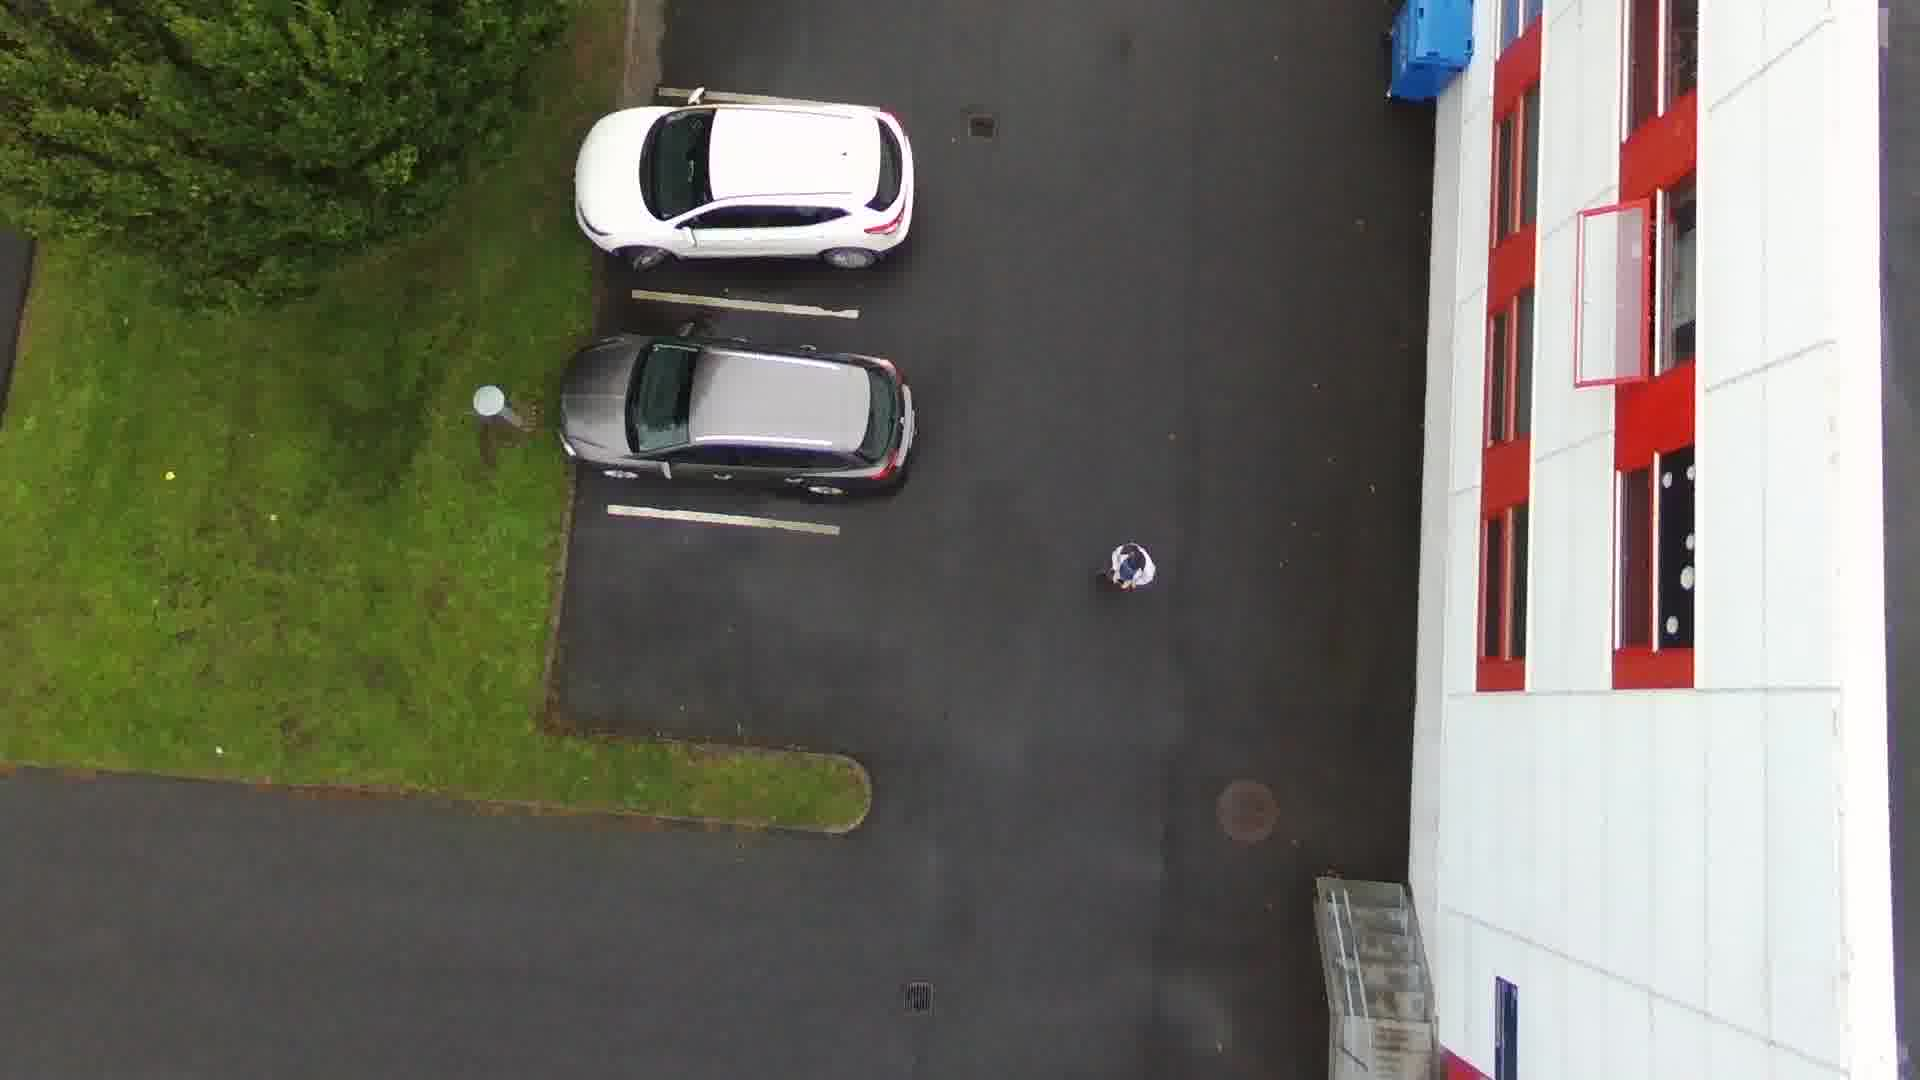

In [11]:
# Display images for given key index or name
ret_index = 7
print("Display image which has index %d:" %ret_index)
display_image(ret_index)


ret_name = "frame_20190829091111_x_0003112.jpg"
print("Display image which has name %s:" %ret_name)
display_image(ret_name)

Display image which has index 7:


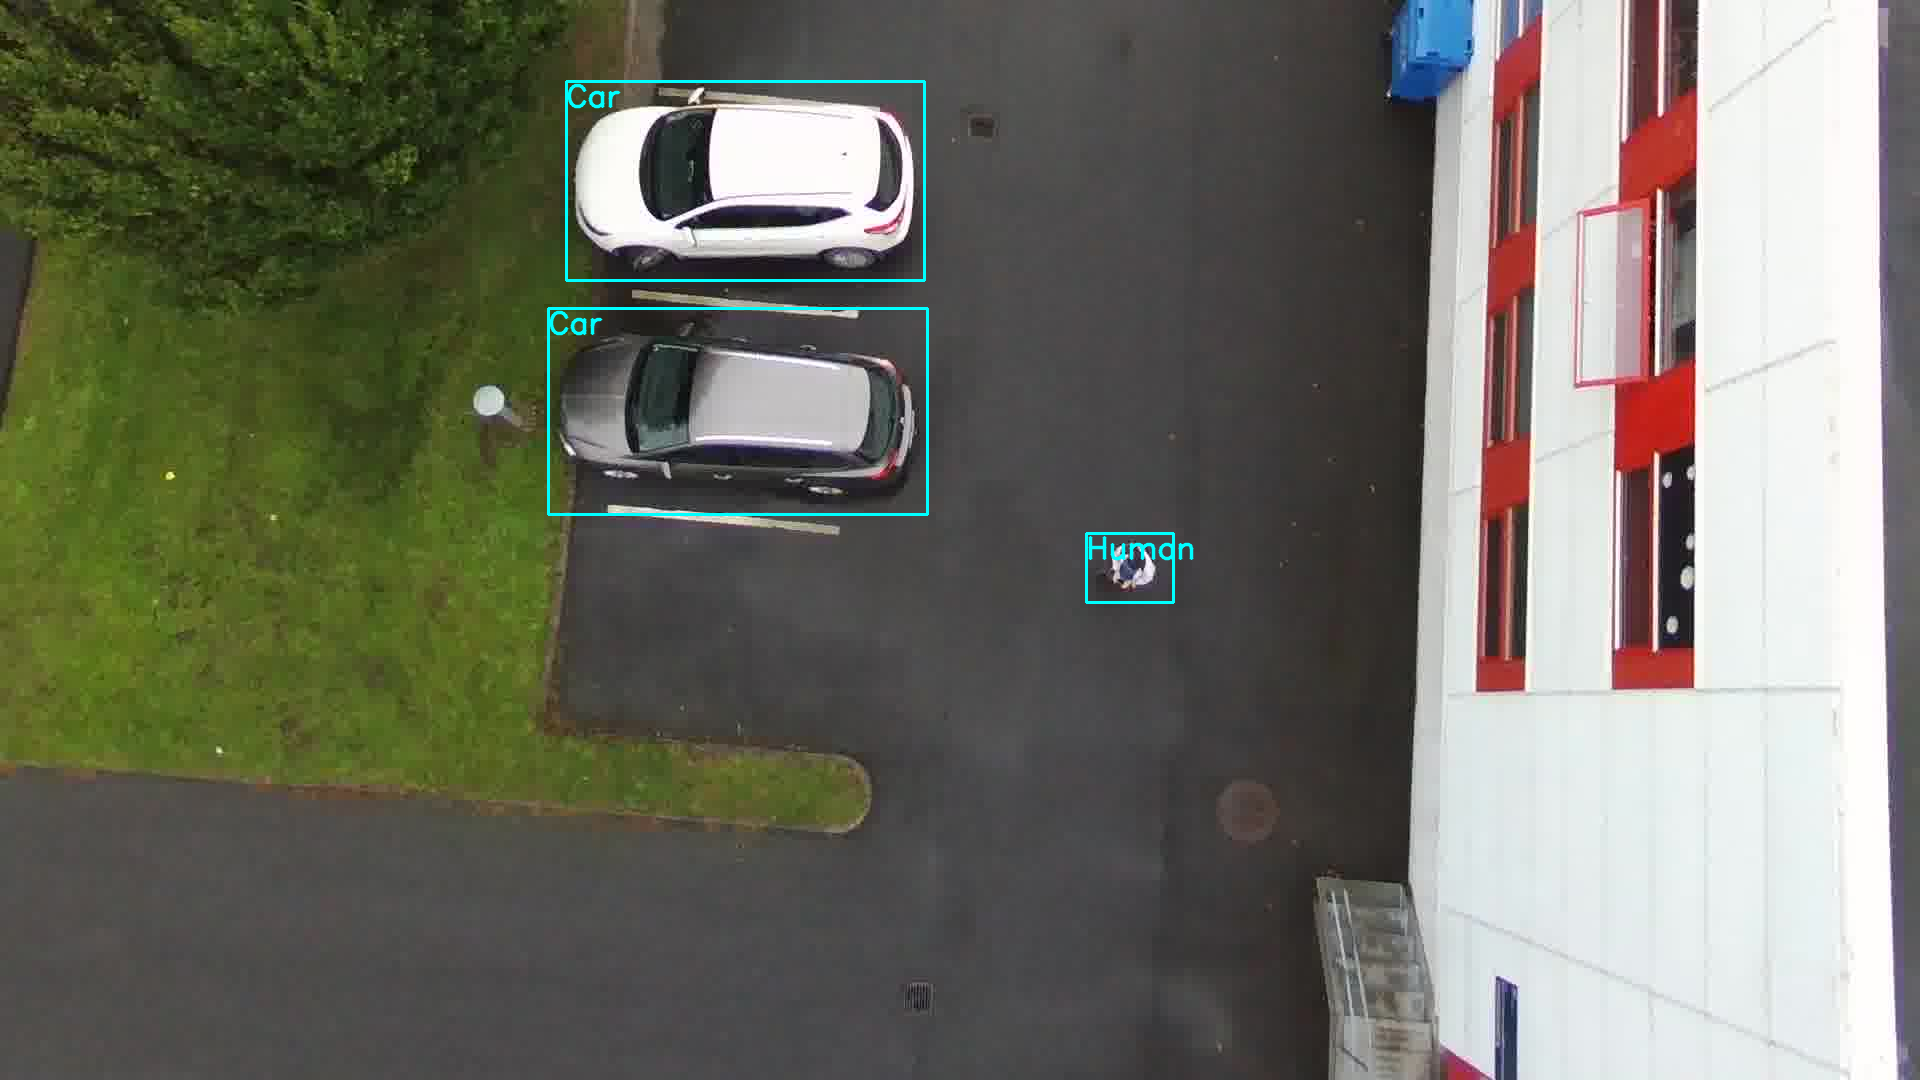

Display image which has name frame_20190829091111_x_0003112.jpg:


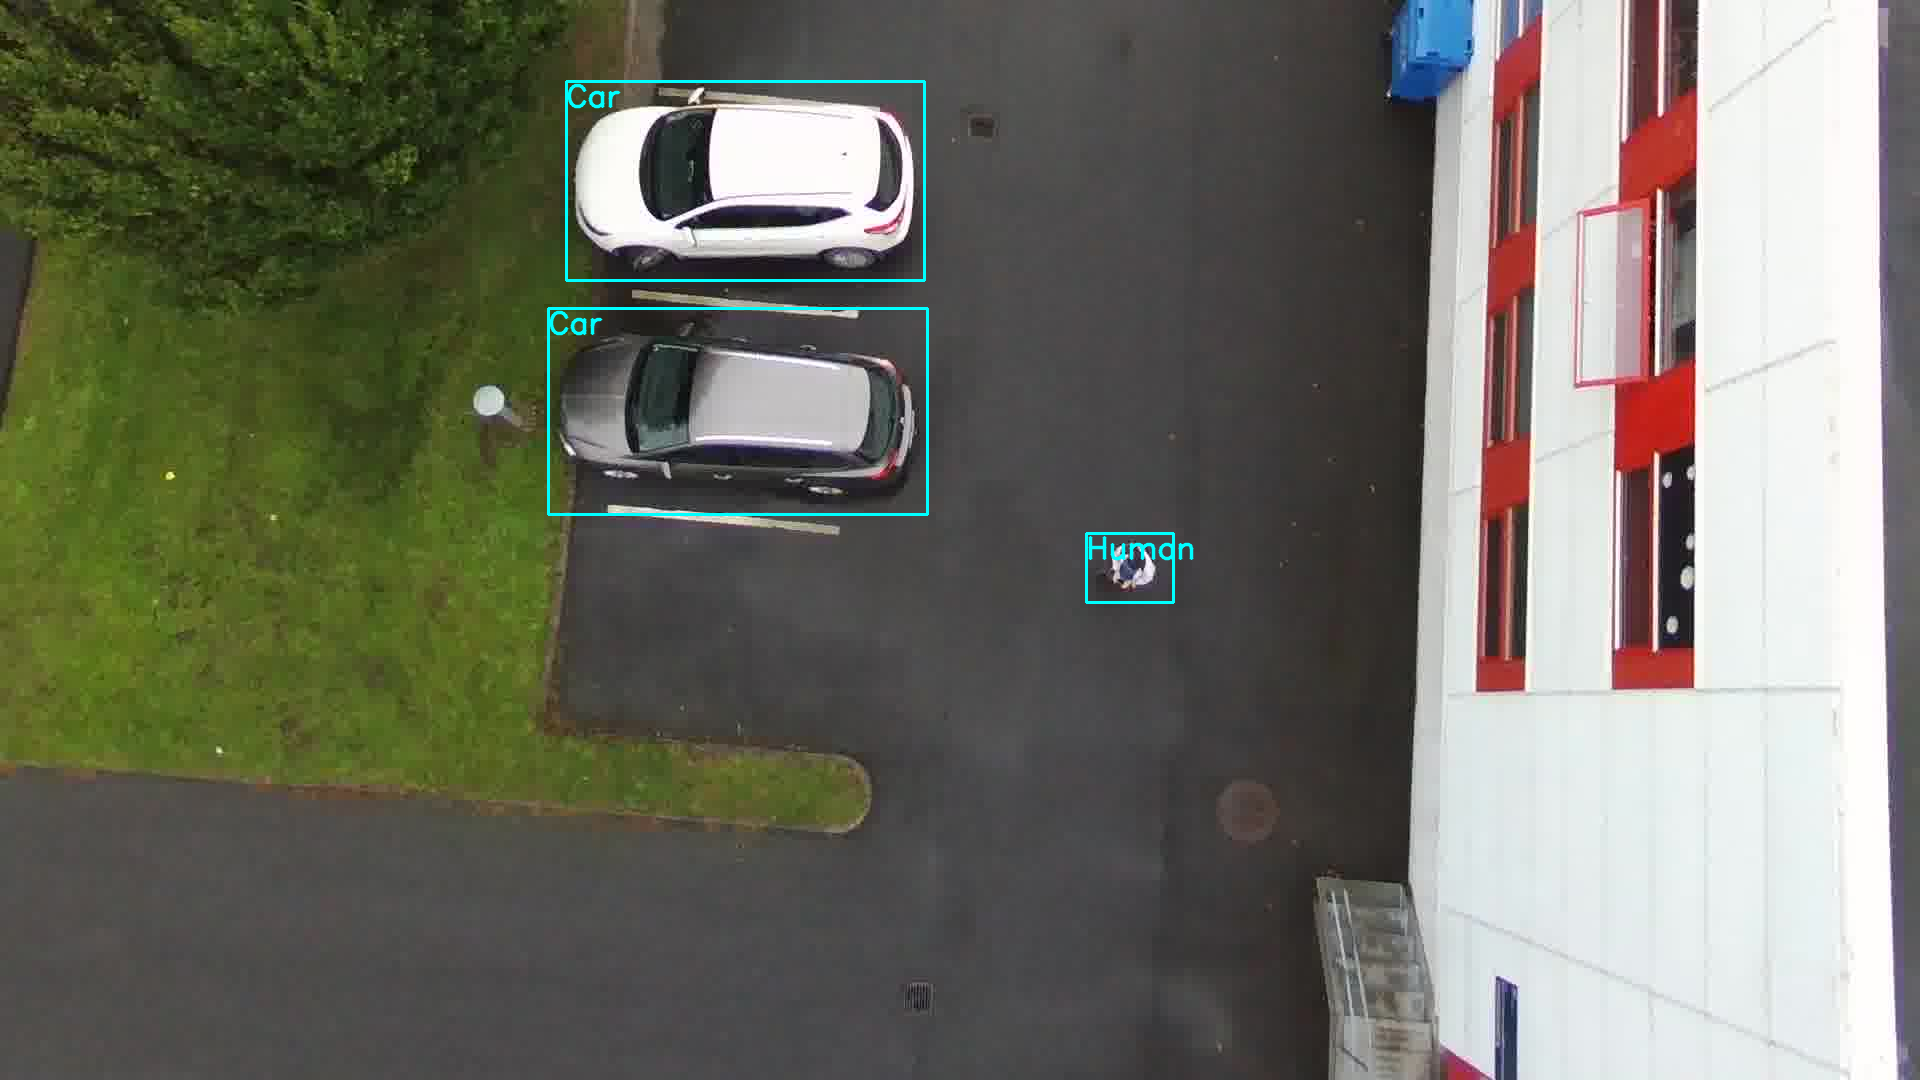

In [12]:
# Display with bounding boxes
ret_index = 7
print("Display image which has index %d:" %ret_index)
display_bboxes(ret_index)

ret_name = "frame_20190829091111_x_0003112.jpg"
print("Display image which has name %s:" %ret_name)
display_bboxes(ret_name)

## Analyze

In [13]:
from collections import Counter

def analyze_class_distribution(auairdataset):
    """
    Analyzes the class distribution of bounding boxes in the AUAIR dataset.

    Args:
        auairdataset: An instance of the AUAIR class.
    """

    class_counts = Counter()
    for i in range(auairdataset.num_samples):
        ann = auairdataset.get_data_by_index(i, ret_img=False)
        for bbox in ann['bbox']:
            class_counts[auairdataset.categories[bbox['class']]] += 1

    total_bboxes = sum(class_counts.values())

    print("Class Distribution:")
    for class_name, count in class_counts.items():
        percentage = (count / total_bboxes) * 100
        print(f"{class_name}: {count} ({percentage:.2f}%)")
    print(f"Total bounding boxes: {total_bboxes}")

analyze_class_distribution(auairdataset)

Class Distribution:
Car: 102619 (77.72%)
Human: 5158 (3.91%)
Truck: 9545 (7.23%)
Van: 9995 (7.57%)
Bicycle: 1128 (0.85%)
Trailer: 2538 (1.92%)
Motorbike: 319 (0.24%)
Bus: 729 (0.55%)
Total bounding boxes: 132031


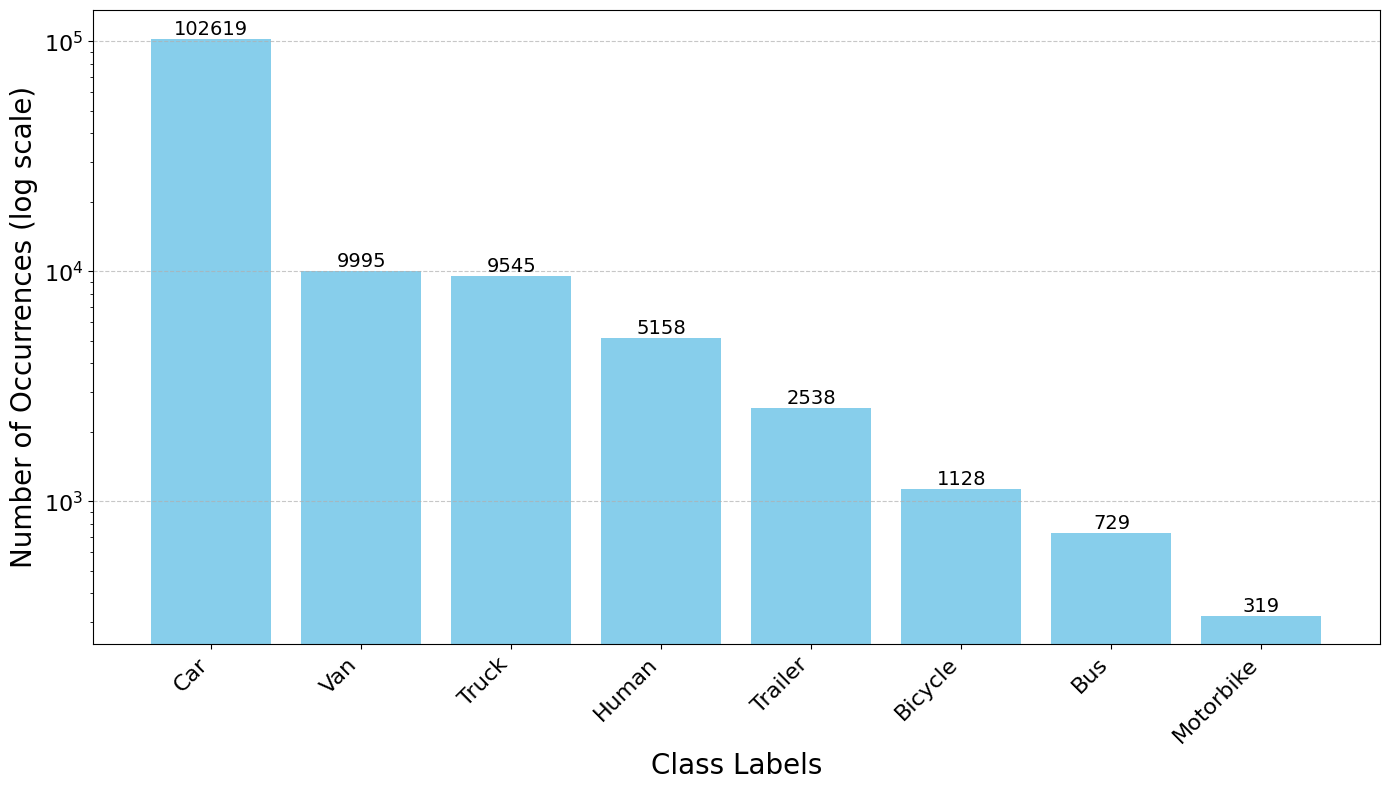

Class Distribution:

Car: 102619 (77.72%)
Human: 5158 (3.91%)
Truck: 9545 (7.23%)
Van: 9995 (7.57%)
Bicycle: 1128 (0.85%)
Trailer: 2538 (1.92%)
Motorbike: 319 (0.24%)
Bus: 729 (0.55%)

Total bounding boxes: 132031


In [14]:
import matplotlib.pyplot as plt
from collections import Counter

def analyze_class_distribution(auairdataset):
    class_counts = Counter()
    for i in range(auairdataset.num_samples):
        ann = auairdataset.get_data_by_index(i, ret_img=False)
        for bbox in ann['bbox']:
            class_counts[auairdataset.categories[bbox['class']]] += 1

    return class_counts

class_counts = analyze_class_distribution(auairdataset)
sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

total_bboxes = sum(class_counts.values())

plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_class_counts.keys(), sorted_class_counts.values(), log=True, color='skyblue')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
for bar, value in zip(bars, sorted_class_counts.values()):
    plt.text(bar.get_x() + bar.get_width()/2, value, str(value), ha='center', va='bottom', fontsize=14)


plt.xlabel("Class Labels", fontsize=20)
plt.ylabel("Number of Occurrences (log scale)", fontsize=20)

plt.tight_layout()
plt.show()


print("Class Distribution:\n")
for class_name, count in class_counts.items():
    percentage = (count / total_bboxes) * 100
    print(f"{class_name}: {count} ({percentage:.2f}%)")
print(f"\nTotal bounding boxes: {total_bboxes}")


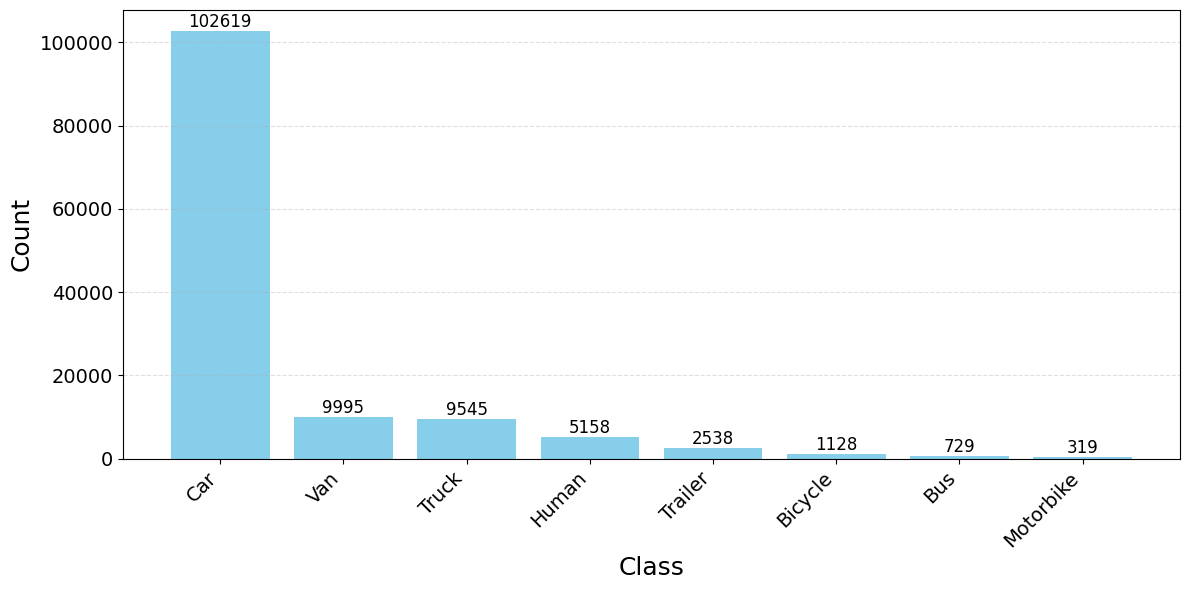

Class Distribution:

Car: 102619 (77.72%)
Van: 9995 (7.57%)
Truck: 9545 (7.23%)
Human: 5158 (3.91%)
Trailer: 2538 (1.92%)
Bicycle: 1128 (0.85%)
Bus: 729 (0.55%)
Motorbike: 319 (0.24%)

Total bounding boxes: 132031


In [15]:
import matplotlib.pyplot as plt

def analyze_class_distribution(auairdataset):
    class_counts = Counter()
    for i in range(auairdataset.num_samples):
        ann = auairdataset.get_data_by_index(i, ret_img=False)
        for bbox in ann['bbox']:
            class_counts[auairdataset.categories[bbox['class']]] += 1

    class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
    total_bboxes = sum(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Class", fontsize=18)
    plt.ylabel("Count", fontsize=18)

    for i, v in enumerate(class_counts.values()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()


    print("Class Distribution:\n")
    for class_name, count in class_counts.items():
        percentage = (count / total_bboxes) * 100
        print(f"{class_name}: {count} ({percentage:.2f}%)")
    print(f"\nTotal bounding boxes: {total_bboxes}")

analyze_class_distribution(auairdataset)

# Model Final

In [37]:
# Fine-tuning DETR on AU-AIR Dataset
!pip install -q datasets transformers[torch] timm wandb torchmetrics matplotlib albumentations

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.auto import tqdm

import torch
from torch.nn.functional import softmax

from datasets import Dataset, DatasetDict
import albumentations as A
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from transformers import TrainingArguments, Trainer
from torchmetrics.detection.mean_ap import MeanAveragePrecision

import wandb
from auairtools.auair import AUAIR


# category mappings for AU-AIR dataset
id2label = {
    0: 'Human',
    1: 'Car',
    2: 'Truck',
    3: 'Van',
    4: 'Motorcycle',
    5: 'Bicycle',
    6: 'Bus',
    7: 'Trailer'
}

label2id = {v: k for k, v in id2label.items()}


print("Loading AU-AIR dataset...")
annotFile = '/content/DI725_assignment/assignment_2/data/auair2019annotations/annotations.json'
dataDir   = '/content/DI725_assignment/assignment_2/data/auair2019data/images'

auairdataset = AUAIR(annotation_file=annotFile, data_folder=dataDir)
print(f"Dataset loaded with {auairdataset.num_samples} samples.")

Loading AU-AIR dataset...
Loading annotations into memory...
Done (t=0.45s)
32823 annotated frames are found.
Checking images...
32823 image files found.
Dataset loaded with 32823 samples.


In [38]:
# filter invalid bounding boxes
def filter_invalid_boxes(bbox_list, category_list, area_list):
    valid_boxes = []
    valid_categories = []
    valid_areas = []

    for i, bbox in enumerate(bbox_list):
        try:
            x_min, y_min, x_max, y_max = bbox
            x_min, y_min, x_max, y_max = float(x_min), float(y_min), float(x_max), float(y_max)

            # check NaN
            if (np.isnan(x_min) or np.isnan(y_min) or np.isnan(x_max) or np.isnan(y_max)):
                print(f"Filtering bbox with NaN values: {bbox}")
                continue

            # check if box is valid (has positive width and height)
            if x_min < x_max and y_min < y_max:
                valid_boxes.append([x_min, y_min, x_max, y_max])
                valid_categories.append(category_list[i])
                valid_areas.append(area_list[i])
            else:
                print(f"Filtering invalid bbox: {bbox} with category {category_list[i]}")
        except Exception as e:
            print(f"Error processing bbox: {e}")
            continue

    return valid_boxes, valid_categories, valid_areas


def convert_auair_to_hf_format(auairdataset, train_ratio=0.6, val_ratio=0.1, test_ratio=0.3, seed=42):
    """
    Convert AU-AIR dataset to a format compatible with Hugging Face datasets.
    Creates three splits: train, val, and test with specified ratios.
    """
    image_ids = []
    image_paths = []
    widths = []
    heights = []
    objects_list = []

    total_images = 0
    skipped_images = 0
    empty_images = 0

    for i in tqdm(range(auairdataset.num_samples)):
        try:
            total_images += 1
            ann = auairdataset.get_data_by_index(i, ret_img=False)

            if len(ann['bbox']) == 0:
                print(f"Skipping image {ann['image_name']} as it has no bounding boxes")
                empty_images += 1
                continue

            image_path = os.path.join(auairdataset.data_folder, ann['image_name'])

            boxes = []
            categories = []
            bbox_ids = []
            areas = []

            for idx, bbox in enumerate(ann['bbox']):
                # Convert from [top, left, height, width] to [left, top, right, bottom]
                left = bbox['left']
                top = bbox['top']
                width = bbox['width']
                height = bbox['height']

                right = left + width
                bottom = top + height

                # Store in PASCAL VOC format: [left, top, right, bottom]
                boxes.append([float(left), float(top), float(right), float(bottom)])

                categories.append(int(bbox['class']))
                bbox_ids.append(i * 100 + idx) # generate unique id
                areas.append(float(width * height))


            valid_boxes, valid_categories, valid_areas = filter_invalid_boxes(boxes, categories, areas)
            if len(valid_boxes) == 0:
                print(f"Skipping image {ann['image_name']} as it has no valid bounding boxes")
                empty_images += 1
                continue

            # update bbox_ids to match the new filtered length
            valid_bbox_ids = bbox_ids[:len(valid_boxes)]

            image_ids.append(i)
            image_paths.append(image_path)
            widths.append(int(ann['image_width:']))
            heights.append(int(ann['image_height']))

            objects_list.append({
                'bbox': valid_boxes,
                'category': valid_categories,
                'bbox_id': valid_bbox_ids,
                'area': valid_areas
            })
        except Exception as e:
            print(f"Error processing sample {i}: {e}")
            skipped_images += 1
            continue

    print(f"Total images: {total_images}")
    print(f"Empty/invalid images skipped: {empty_images}")
    print(f"Error images skipped: {skipped_images}")
    print(f"Valid images kept: {len(image_ids)}")

    dataset_dict = {
        'image_id': image_ids,
        'image_path': image_paths,
        'width': widths,
        'height': heights,
        'objects': objects_list
    }

    full_dataset = Dataset.from_dict(dataset_dict)
    full_dataset = full_dataset.shuffle(seed=seed)

    # create a 60/10/30 split
    first_split = full_dataset.train_test_split(train_size=train_ratio+val_ratio, test_size=test_ratio, seed=seed)
    second_split_ratio = train_ratio / (train_ratio + val_ratio)
    second_split = first_split['train'].train_test_split(train_size=second_split_ratio, seed=seed)

    dataset_dict = DatasetDict({
        'train': second_split['train'],
        'val': second_split['test'],
        'test': first_split['test']
    })

    return dataset_dict


# create smaller samples
def create_sample(dataset, sample_fraction=0.10, seed=42):
    sample_size = max(1, int(sample_fraction * len(dataset)))
    sampled_dataset = dataset.shuffle(seed=seed).select(range(sample_size))
    print(f"Original size: {len(dataset)}")
    print(f"Sample size: {len(sampled_dataset)}")
    return sampled_dataset


print("Converting dataset to Hugging Face format...")
dataset = convert_auair_to_hf_format(auairdataset, train_ratio=0.6, val_ratio=0.1, test_ratio=0.3)
print(f"Dataset converted: {len(dataset['train'])} training, {len(dataset['val'])} validation, {len(dataset['test'])} test samples")

print("Creating dataset subsets for faster training...")
sample_fraction = 0.05  # Use 10% of the data - adjust this as needed
dataset['train'] = create_sample(dataset['train'], sample_fraction=sample_fraction)
dataset['val'] = create_sample(dataset['val'], sample_fraction=sample_fraction)
dataset['test'] = create_sample(dataset['test'], sample_fraction=sample_fraction)

Converting dataset to Hugging Face format...


  0%|          | 0/32823 [00:00<?, ?it/s]

Filtering invalid bbox: [1892.0, 0.0, 1892.0, 0.0] with category 1
Filtering invalid bbox: [874.0, 689.0, 874.0, 689.0] with category 1
Filtering invalid bbox: [1022.0, 185.0, 1022.0, 185.0] with category 0
Filtering invalid bbox: [1563.0, 1080.0, 1563.0, 1080.0] with category 1
Filtering invalid bbox: [677.0, 398.0, 677.0, 398.0] with category 1
Filtering invalid bbox: [680.0, 389.0, 680.0, 389.0] with category 1
Filtering invalid bbox: [559.0, 797.0, 559.0, 797.0] with category 2
Filtering invalid bbox: [795.0, 699.0, 795.0, 699.0] with category 2
Filtering invalid bbox: [1760.0, 290.0, 1760.0, 290.0] with category 1
Filtering invalid bbox: [691.0, 995.0, 691.0, 995.0] with category 2
Filtering invalid bbox: [725.0, 932.0, 725.0, 932.0] with category 2
Filtering invalid bbox: [696.0, 927.0, 696.0, 927.0] with category 2
Filtering invalid bbox: [1205.0, 1080.0, 1205.0, 1080.0] with category 1
Filtering invalid bbox: [1495.0, 1080.0, 1495.0, 1080.0] with category 1
Filtering invalid bb

Visualizing dataset examples...


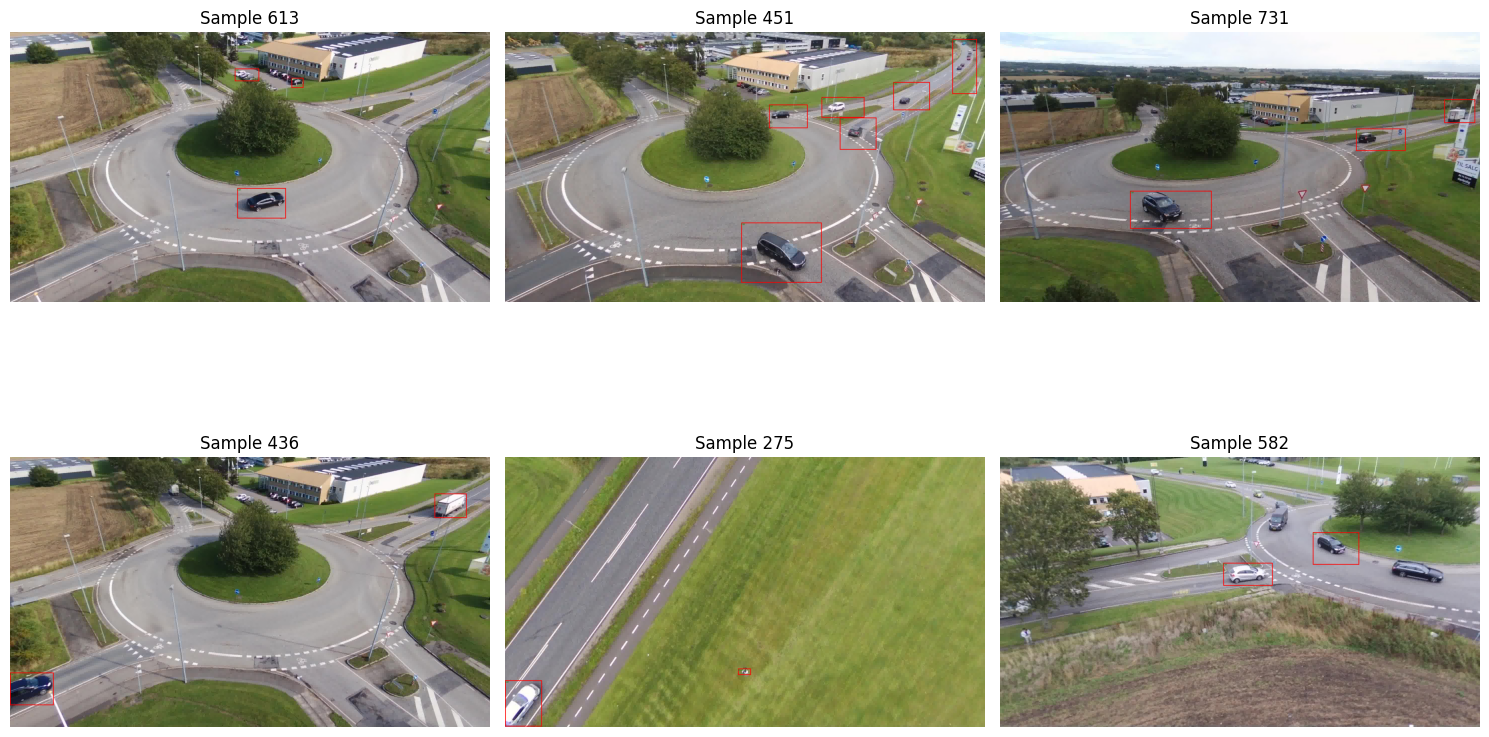

Analyzing class distribution...


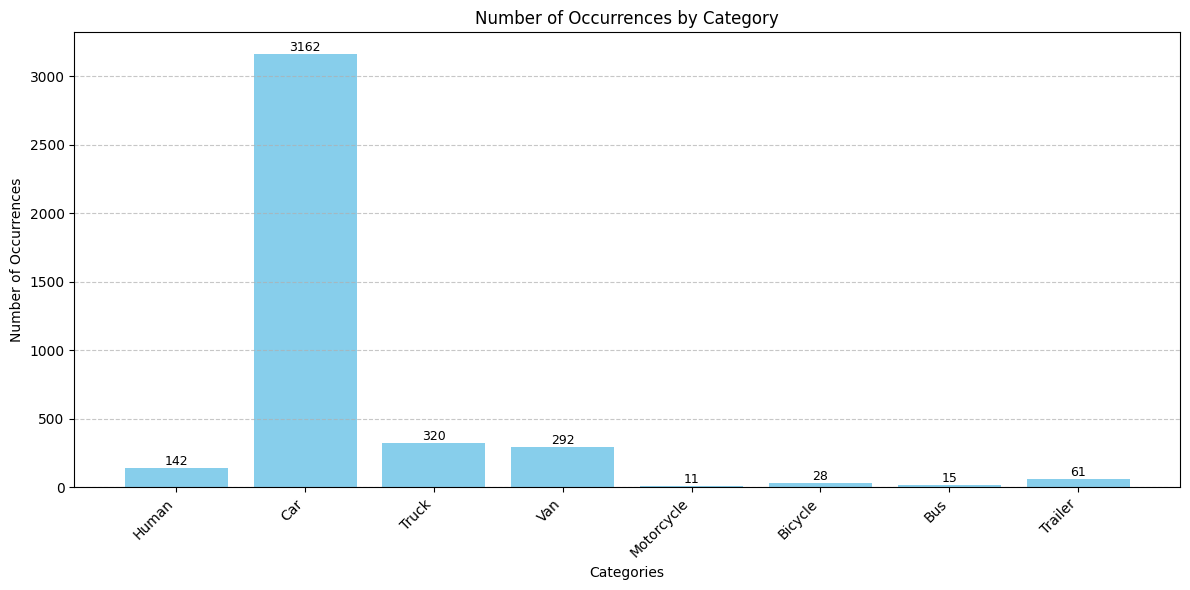

Class distribution: {'Human': 142, 'Car': 3162, 'Truck': 320, 'Van': 292, 'Motorcycle': 11, 'Bicycle': 28, 'Bus': 15, 'Trailer': 61}


In [39]:
def draw_image_with_boxes(image_path, objects):
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    for i in range(len(objects["bbox_id"])):
        box = objects["bbox"][i]
        x1, y1, x2, y2 = tuple(box)
        draw.rectangle((x1, y1, x2, y2), outline="red", width=3)
        draw.text((x1, y1), id2label[objects["category"][i]], fill="green")

    return image


def visualize_dataset_samples(dataset, num_samples=6):
    # get random
    if len(dataset) < num_samples:
        num_samples = len(dataset)
    indices = np.random.choice(len(dataset), size=num_samples, replace=False).tolist()

    cols = min(3, num_samples)
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    if rows == 1 and cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, idx in enumerate(indices):
        sample = dataset[idx]
        image = draw_image_with_boxes(sample['image_path'], sample['objects'])

        axes[i].imshow(image)
        axes[i].set_title(f"Sample {idx}")
        axes[i].axis("off")

    for j in range(i + 1, rows * cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing dataset examples...")
visualize_dataset_samples(dataset['train'])



def analyze_class_distribution(dataset):
    category_counts = {label: 0 for label in id2label.values()}

    for example in dataset:
        for category in example['objects']['category']:
            category_counts[id2label[category]] += 1

    categories = list(category_counts.keys())
    values = list(category_counts.values())

    plt.figure(figsize=(12, 6))
    bars = plt.bar(categories, values, color='skyblue')

    plt.xlabel('Categories')
    plt.ylabel('Number of Occurrences')
    plt.title('Number of Occurrences by Category')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0, height,
            f'{height}', ha='center', va='bottom', fontsize=9
        )

    plt.tight_layout()
    plt.show()

    return category_counts

print("Analyzing class distribution...")
class_distribution = analyze_class_distribution(dataset['train'])
print("Class distribution:", class_distribution)

In [40]:
train_transform = A.Compose(
    [
        A.LongestMaxSize(400),
        A.PadIfNeeded(400, 400, border_mode=0, value=(0, 0, 0)),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ],
    bbox_params=A.BboxParams(
        format="pascal_voc",
        label_fields=["category"]
    ),
)

val_transform = A.Compose(
    [
        A.LongestMaxSize(400),
        A.PadIfNeeded(400, 400, border_mode=0, value=(0, 0, 0)),
    ],
    bbox_params=A.BboxParams(
        format="pascal_voc",
        label_fields=["category"]
    ),
)

<ipython-input-40-deae90eb7dd7>:5: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(400, 400, border_mode=0, value=(0, 0, 0)),
<ipython-input-40-deae90eb7dd7>:18: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(400, 400, border_mode=0, value=(0, 0, 0)),


In [41]:
print("Initializing image processor and model...")
checkpoint = "facebook/detr-resnet-50-dc5"
# checkpoint = "facebook/detr-resnet-50"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

model = AutoModelForObjectDetection.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

Initializing image processor and model...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [42]:
# ORIGINATED FROM: fine_tuning_detr_on_custom_dataset.ipynb notebook
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "image_id": image_id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": area[i],
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations

def convert_voc_to_coco(bbox):
    xmin, ymin, xmax, ymax = bbox
    width = max(0.1, xmax - xmin)
    height = max(0.1, ymax - ymin)
    return [xmin, ymin, width, height]


def convert_to_tensor(item):
    if isinstance(item, (int, float)):
        return torch.tensor(item)
    elif isinstance(item, list):
        try:
            return torch.tensor(item)
        except (ValueError, TypeError):
            return [convert_to_tensor(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_to_tensor(v) for k, v in item.items()}
    elif isinstance(item, tuple):
        return tuple(convert_to_tensor(x) for x in item)
    else:
        return item

def transform_aug_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes_list, area_list, categories_list = [], [], [], []
    orig_sizes = []

    for image_path, objects, width, height in zip(examples["image_path"], examples["objects"], examples["width"], examples["height"]):
        # double check
        if len(objects["bbox"]) == 0:
            continue

        try:
            # load image
            image = np.array(Image.open(image_path).convert("RGB"))[:, :, ::-1]

            orig_sizes.append((width, height))

            # double check bounding boxes
            valid_boxes, valid_categories, valid_areas = filter_invalid_boxes(
                objects["bbox"], objects["category"], objects["area"]
            )

            # skip if there are no valid bounding boxes after filtering
            if len(valid_boxes) == 0:
                continue

            # apply training augmentation
            out = train_transform(
                image=image,
                bboxes=valid_boxes,
                category=valid_categories
            )

            # skip if augmentation resulted in no valid boxes
            if len(out["bboxes"]) == 0:
                continue

            # re-check boxes after augmentation for NaN values
            new_valid_boxes = []
            new_valid_categories = []
            for j, box in enumerate(out["bboxes"]):
                if any(np.isnan(coord) for coord in box):
                    print(f"Filtering post-augmentation bbox with NaN: {box}")
                    continue
                if box[0] < box[2] and box[1] < box[3]:  # x_min < x_max and y_min < y_max
                    new_valid_boxes.append(box)
                    new_valid_categories.append(out["category"][j])

            if len(new_valid_boxes) == 0:
                continue

            area_list.append(valid_areas[:len(new_valid_categories)])
            images.append(out["image"])


            # Convert to COCO format
            converted_bboxes = []
            for box in new_valid_boxes:
                x_min, y_min, x_max, y_max = box
                x_min = max(0, x_min)
                y_min = max(0, y_min)
                x_max = max(x_min + 1, x_max)  # width > 0
                y_max = max(y_min + 1, y_max)  # height > 0

                width = x_max - x_min
                height = y_max - y_min
                converted_bboxes.append([x_min, y_min, width, height])

            bboxes_list.append(converted_bboxes)
            categories_list.append(new_valid_categories)

        except Exception as e:
            print(f"Error during transformation: {e} for image {image_path}")
            continue

    # skip if no valid samples were processed
    if len(images) == 0:
        return {"pixel_values": [], "labels": []}



    targets = []
    for id_, cat_, ar_, box_, orig_size in zip(
        image_ids[:len(images)], categories_list, area_list, bboxes_list, orig_sizes
    ):
        target = {
            "image_id": id_,
            "annotations": formatted_anns(id_, cat_, ar_, box_),
            "orig_size": orig_size
        }
        targets.append(target)

    try:
        result = image_processor(images=images, annotations=targets, return_tensors="pt")

        # ensure types
        for label in result["labels"]:
            for key in list(label.keys()):
                if isinstance(label[key], (int, float)):
                    label[key] = torch.tensor(label[key])
                elif isinstance(label[key], list):
                    try:
                        label[key] = torch.tensor(label[key])
                    except (ValueError, TypeError):
                        pass

                if key == "orig_size":
                    if not torch.is_tensor(label[key]):
                        if isinstance(label[key], (list, tuple)) and len(label[key]) == 2:
                            label[key] = torch.tensor(list(label[key]))
                        else:
                            label[key] = torch.tensor([400, 400])

        return result
    except Exception as e:
        print(f"Error in image processor: {e}")
        return {"pixel_values": [], "labels": []}



# similar with train set
def transform_val_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes_list, area_list, categories_list = [], [], [], []
    orig_sizes = []

    for image_path, objects, width, height in zip(examples["image_path"], examples["objects"], examples["width"], examples["height"]):
        if len(objects["bbox"]) == 0:
            continue

        try:
            image = np.array(Image.open(image_path).convert("RGB"))[:, :, ::-1]
            orig_sizes.append((width, height))

            valid_boxes, valid_categories, valid_areas = filter_invalid_boxes(
                objects["bbox"], objects["category"], objects["area"]
            )

            if len(valid_boxes) == 0:
                continue

            out = val_transform(
                image=image,
                bboxes=valid_boxes,
                category=valid_categories
            )

            if len(out["bboxes"]) == 0:
                continue

            new_valid_boxes = []
            new_valid_categories = []
            for j, box in enumerate(out["bboxes"]):
                if any(np.isnan(coord) for coord in box):
                    print(f"Filtering post-transform bbox with NaN: {box}")
                    continue
                if box[0] < box[2] and box[1] < box[3]:  # x_min < x_max and y_min < y_max
                    new_valid_boxes.append(box)
                    new_valid_categories.append(out["category"][j])

            if len(new_valid_boxes) == 0:
                continue

            area_list.append(valid_areas[:len(new_valid_categories)])
            images.append(out["image"])

            # Convert to COCO format with safety checks
            converted_bboxes = []
            for box in new_valid_boxes:
                x_min, y_min, x_max, y_max = box
                x_min = max(0, x_min)
                y_min = max(0, y_min)
                x_max = max(x_min + 1, x_max)  # width > 0
                y_max = max(y_min + 1, y_max)  # height > 0

                width = x_max - x_min
                height = y_max - y_min
                converted_bboxes.append([x_min, y_min, width, height])

            bboxes_list.append(converted_bboxes)
            categories_list.append(new_valid_categories)

        except Exception as e:
            print(f"Error during validation transform: {e} for image {image_path}")
            continue

    if len(images) == 0:
        return {"pixel_values": [], "labels": []}

    targets = []
    for id_, cat_, ar_, box_, orig_size in zip(
        image_ids[:len(images)], categories_list, area_list, bboxes_list, orig_sizes
    ):
        target = {
            "image_id": id_,
            "annotations": formatted_anns(id_, cat_, ar_, box_),
            "orig_size": orig_size
        }
        targets.append(target)



    try:
        result = image_processor(images=images, annotations=targets, return_tensors="pt")

        for label in result["labels"]:
            for key in list(label.keys()):
                if isinstance(label[key], (int, float)):
                    label[key] = torch.tensor(label[key])
                elif isinstance(label[key], list):
                    try:
                        label[key] = torch.tensor(label[key])
                    except (ValueError, TypeError):
                        pass

                if key == "orig_size":
                    if not torch.is_tensor(label[key]):
                        # Convert to tensor
                        if isinstance(label[key], (list, tuple)) and len(label[key]) == 2:
                            label[key] = torch.tensor(list(label[key]))
                        else:
                            label[key] = torch.tensor([400, 400])

        return result
    except Exception as e:
        print(f"Error in image processor: {e}")
        return {"pixel_values": [], "labels": []}





print("Setting up transformed datasets...")
train_dataset_transformed = dataset['train'].with_transform(transform_aug_ann)
val_dataset_transformed = dataset['val'].with_transform(transform_val_ann)
test_dataset_transformed = dataset['test'].with_transform(transform_val_ann)

Setting up transformed datasets...


In [43]:
def denormalize_boxes(boxes, width, height):
    boxes = boxes.clone()
    boxes[:, 0] *= width  # xmin
    boxes[:, 1] *= height  # ymin
    boxes[:, 2] *= width  # xmax
    boxes[:, 3] *= height  # ymax
    return boxes

def collate_fn(batch):
    # filter empty examples
    batch = [item for item in batch if "pixel_values" in item and len(item["pixel_values"]) > 0]

    # when batch is empty after filtering, return empty tensors
    if len(batch) == 0:
        return {
            "pixel_values": torch.zeros((0, 3, 400, 400), dtype=torch.float32),
            "pixel_mask": torch.zeros((0, 400, 400), dtype=torch.bool),
            "labels": []
        }

    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")

    labels = []
    for item in batch:
        if "labels" not in item:
            continue

        label_dict = item["labels"]
        converted_dict = convert_to_tensor(label_dict)
        labels.append(converted_dict)

    batch_dict = {}
    batch_dict["pixel_values"] = encoding["pixel_values"]
    batch_dict["pixel_mask"] = encoding["pixel_mask"]
    batch_dict["labels"] = labels

    return batch_dict




def custom_evaluate_model(model, dataset, batch_size=4):
    model.eval()
    device = next(model.parameters()).device
    print(f"Model is on device: {device}")

    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=False
    )

    all_preds = []
    all_targets = []

    print(f"Running evaluation on {len(dataset)} samples in {len(dataloader)} batches")

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(dataloader, desc="Evaluating")):
            pixel_values = batch["pixel_values"].to(device)
            pixel_mask = batch["pixel_mask"].to(device) if "pixel_mask" in batch else None
            labels = batch["labels"]

            print(f"Batch {batch_idx}, pixel values shape: {pixel_values.shape}, labels count: {len(labels)}")

            # forward
            outputs = model(
                pixel_values=pixel_values,
                pixel_mask=pixel_mask
            )

            # get preds
            scores = outputs.logits
            pred_boxes = outputs.pred_boxes


            for i, label in enumerate(labels):
                try:
                    try:
                        if torch.is_tensor(label['orig_size']):
                            width, height = label['orig_size'][0].item(), label['orig_size'][1].item()
                        elif isinstance(label['orig_size'], (list, tuple)):
                            width, height = label['orig_size'][0], label['orig_size'][1]
                        else:
                            width, height = 400, 400
                    except (KeyError, TypeError, IndexError) as e:
                        print(f"Error getting orig_size: {e}, using default 400x400")
                        width, height = 400, 400


                    print(f"Sample {i} in batch: image size {width}x{height}")


                    pred_scores = scores[i][:, :-1]  # Exclude the no-object class
                    pred_scores = softmax(pred_scores, dim=-1)
                    pred_boxes_i = denormalize_boxes(pred_boxes[i], width, height)
                    pred_labels = torch.argmax(pred_scores, dim=-1)


                    pred_scores_for_labels = torch.gather(pred_scores, 1, pred_labels.unsqueeze(-1)).squeeze(-1)
                    top_k = min(100, pred_scores_for_labels.shape[0])
                    top_indices = torch.topk(pred_scores_for_labels, top_k).indices

                    valid_boxes = pred_boxes_i[top_indices]
                    valid_scores = pred_scores_for_labels[top_indices]
                    valid_labels = pred_labels[top_indices]


                    valid_indices = []
                    for j, (box, score) in enumerate(zip(valid_boxes, valid_scores)):
                        # skip only if all box coordinates are NaN
                        if torch.isnan(box).all():
                            continue
                        # skip only boxes with negative width/height
                        if box[0] > box[2] or box[1] > box[3]:
                            # fix the box instead of skipping
                            valid_boxes[j][2] = max(box[2], box[0] + 1)  # width > 0
                            valid_boxes[j][3] = max(box[3], box[1] + 1)  # height > 0
                        valid_indices.append(j)

                    if not valid_indices:
                        print(f"No valid predictions for sample {i} in batch {batch_idx}")
                        if pred_boxes_i.shape[0] > 0:
                            default_box = torch.tensor([[0, 0, 1, 1]], device=pred_boxes_i.device)
                            default_score = torch.tensor([0.01], device=pred_scores_for_labels.device)
                            default_label = torch.tensor([0], device=pred_labels.device)
                            all_preds.append({
                                "boxes": default_box,
                                "scores": default_score,
                                "labels": default_label,
                            })
                        continue

                    filtered_boxes = valid_boxes[valid_indices]
                    filtered_scores = valid_scores[valid_indices]
                    filtered_labels = valid_labels[valid_indices]

                    all_preds.append({
                        "boxes": filtered_boxes,
                        "scores": filtered_scores,
                        "labels": filtered_labels,
                    })

                    try:
                        denormalized_boxes = denormalize_boxes(label["boxes"], width, height)
                        all_targets.append({
                            "boxes": denormalized_boxes,
                            "labels": label["class_labels"],
                        })
                    except (KeyError, ValueError, RuntimeError) as e:
                        print(f"Error processing target for sample {i} in batch {batch_idx}: {e}")
                        # add empty target as fallback
                        dummy_box = torch.tensor([[0, 0, 1, 1]], device=device)
                        dummy_label = torch.tensor([0], device=device)
                        all_targets.append({
                            "boxes": dummy_box,
                            "labels": dummy_label,
                        })

                except Exception as e:
                    print(f"Error processing sample {i} in batch {batch_idx}: {e}")
                    continue

    print(f"Collected {len(all_preds)} predictions and {len(all_targets)} targets")

    if not all_preds or not all_targets:
        print("Warning: No valid predictions or targets to evaluate.")
        return {"map": 0.0}

    if len(all_preds) != len(all_targets):
        print(f"Warning: Mismatch between prediction count ({len(all_preds)}) and target count ({len(all_targets)})")
        min_count = min(len(all_preds), len(all_targets))
        all_preds = all_preds[:min_count]
        all_targets = all_targets[:min_count]

    metric = MeanAveragePrecision(box_format='xyxy', class_metrics=True)

    # update metric with all predictions and targets
    try:
        metric.update(preds=all_preds, target=all_targets)
        metrics = metric.compute()

        result_metrics = {}
        result_metrics["map"] = metrics["map"].item()

        # process per-class metrics
        classes = metrics.pop("classes")
        map_per_class = metrics.pop("map_per_class")
        mar_100_per_class = metrics.pop("mar_100_per_class")

        for class_id, class_map, class_mar in zip(classes, map_per_class, mar_100_per_class):
            class_id_val = class_id.item()
            class_name = id2label[class_id_val] if class_id_val in id2label else f"class_{class_id_val}"
            result_metrics[f"map_{class_name}"] = class_map.item()
            result_metrics[f"mar_100_{class_name}"] = class_mar.item()

        for k, v in metrics.items():
            result_metrics[k] = v.item()

        return result_metrics

    except Exception as e:
        print(f"Error computing metrics: {e}")
        return {"map": 0.0}


def compute_metrics(eval_pred):
    loss_dict = eval_pred[0][0]
    return {
        "loss": loss_dict["loss_ce"].item() + loss_dict["loss_bbox"].item(),
        "loss_ce": loss_dict["loss_ce"].item(),
        "loss_bbox": loss_dict["loss_bbox"].item()
    }

In [44]:
output_dir = "detr-resnet-50-dc5-auair-finetuned"

training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=4,
    num_train_epochs=15,
    fp16=False,
    save_steps=200,
    eval_steps=50,
    logging_steps=10,
    learning_rate=2e-4,
    weight_decay=1e-4,
    save_total_limit=1,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="wandb",
    load_best_model_at_end=True,
    metric_for_best_model="loss",
    eval_strategy="steps",
    dataloader_num_workers=0,
    dataloader_drop_last=False,
    lr_scheduler_type="cosine",
    warmup_ratio=0.1,
    prediction_loss_only=True,
)




wandb.init(
    project="detr-auair-detection",
    name="detr-resnet-50-dc5-auair-final-longrun-less-data",
    config={
        "learning_rate": training_args.learning_rate,
        "epochs": training_args.num_train_epochs,
        "batch_size": training_args.per_device_train_batch_size,
        "model_checkpoint": checkpoint,
        "dataset": "AU-AIR",
        "dataset_split": "60/10/30",
        "sample_fraction": sample_fraction
    }
)

In [46]:
print("Setting up trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=train_dataset_transformed,
    eval_dataset=val_dataset_transformed,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)


print("Starting training...")
trainer.train()

Setting up trainer...
Starting training...


<ipython-input-46-5ad3fdf9b493>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=1845, training_loss=2.525449710422092, metrics={'train_runtime': 2481.6557, 'train_samples_per_second': 5.948, 'train_steps_per_second': 0.743, 'total_flos': 7.0526923098624e+18, 'train_loss': 2.525449710422092, 'epoch': 15.0})

In [15]:
print("Setting up trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=train_dataset_transformed,
    eval_dataset=val_dataset_transformed,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)


print("Starting training...")
trainer.train()

Setting up trainer...
Starting training...


<ipython-input-15-5ad3fdf9b493>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


KeyboardInterrupt: 

In [47]:
print("Setting up trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=train_dataset_transformed,
    eval_dataset=val_dataset_transformed,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)


print("Starting training...")
trainer.train()

Setting up trainer...
Starting training...


<ipython-input-47-5ad3fdf9b493>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=1230, training_loss=2.4534582773844402, metrics={'train_runtime': 1661.2019, 'train_samples_per_second': 5.923, 'train_steps_per_second': 0.74, 'total_flos': 4.7017948732416e+18, 'train_loss': 2.4534582773844402, 'epoch': 10.0})

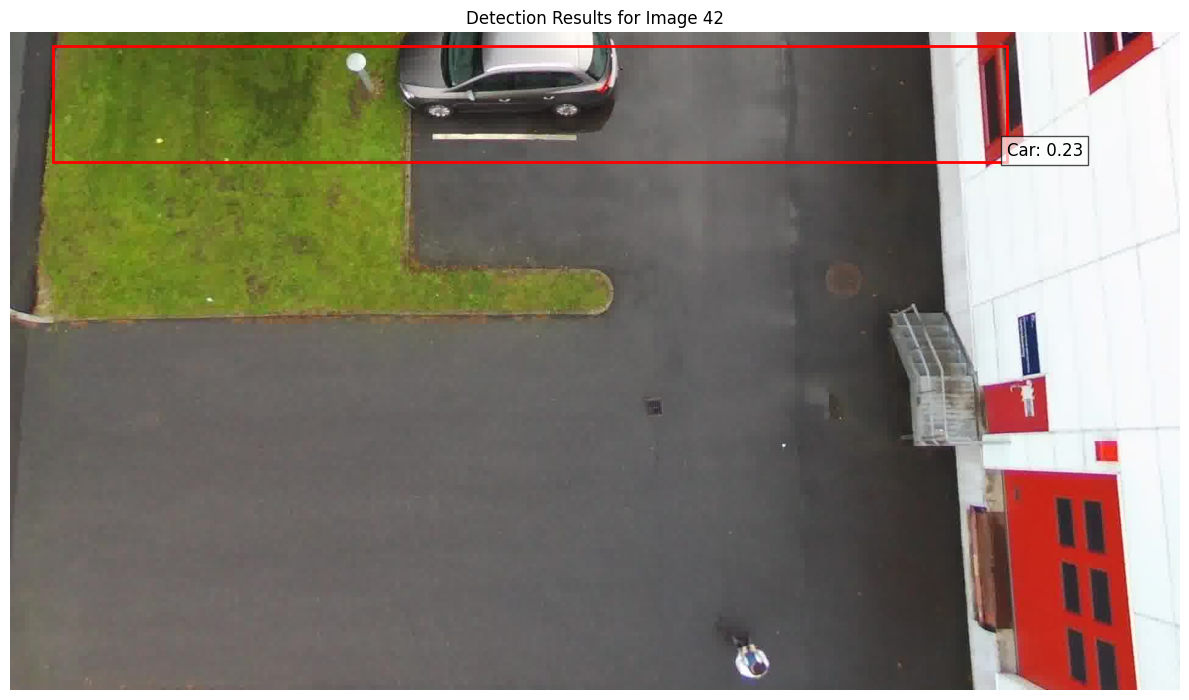

Detection results for Image 42:
  Car (0.23): [1634.9062    213.14005    69.43332    21.986614]
  Car (0.13): [1614.2357   892.78796   99.6362    25.57648]
  Car (0.15): [948.9401   181.11842   79.34425   21.323204]
  Car (0.10): [459.669    459.60474   86.49666   42.404152]
  Car (0.21): [1591.3649    220.96399    73.26414    25.443165]
  Car (0.17): [903.3613   190.30717   98.00406   24.438272]
  Car (0.17): [882.5427   192.4554    69.48475   18.361588]
  Car (0.15): [675.12897  186.59236   93.96266   23.862038]
  Car (0.15): [692.7181   193.73845   79.91354   20.650568]
  Car (0.17): [720.0494   185.407     82.54157   21.308743]
  Car (0.20): [931.04156  184.47708   68.38511   17.924759]
  Car (0.13): [719.55914  189.9394   175.1114    42.903122]
  Car (0.13): [1661.472     210.88126    66.7554     22.180933]
  Car (0.12): [1558.9392    774.21423   126.862976   50.4588  ]
  Car (0.22): [1634.0085    223.06995    98.2905     32.334976]
  Car (0.23): [1618.3085    213.67465    76.8890

(<PIL.Image.Image image mode=RGB size=1920x1080>,
 array([[1634.9062  ,  213.14005 ,   69.43332 ,   21.986614],
        [1614.2357  ,  892.78796 ,   99.6362  ,   25.57648 ],
        [ 948.9401  ,  181.11842 ,   79.34425 ,   21.323204],
        [ 459.669   ,  459.60474 ,   86.49666 ,   42.404152],
        [1591.3649  ,  220.96399 ,   73.26414 ,   25.443165],
        [ 903.3613  ,  190.30717 ,   98.00406 ,   24.438272],
        [ 882.5427  ,  192.4554  ,   69.48475 ,   18.361588],
        [ 675.12897 ,  186.59236 ,   93.96266 ,   23.862038],
        [ 692.7181  ,  193.73845 ,   79.91354 ,   20.650568],
        [ 720.0494  ,  185.407   ,   82.54157 ,   21.308743],
        [ 931.04156 ,  184.47708 ,   68.38511 ,   17.924759],
        [ 719.55914 ,  189.9394  ,  175.1114  ,   42.903122],
        [1661.472   ,  210.88126 ,   66.7554  ,   22.180933],
        [1558.9392  ,  774.21423 ,  126.862976,   50.4588  ],
        [1634.0085  ,  223.06995 ,   98.2905  ,   32.334976],
        [1618.3085  

In [69]:
def visualize_detection_example(model, dataset, idx=None, threshold=0.3):
    model.eval()
    device = next(model.parameters()).device

    # select random
    if idx is None:
        idx = np.random.randint(0, len(dataset))

    sample = dataset[idx]
    image_path = sample['image_path']
    image = Image.open(image_path).convert('RGB')
    orig_size = image.size

    inputs = image_processor(images=image, return_tensors="pt")
    pixel_values = inputs["pixel_values"].to(device)


    with torch.no_grad():
        outputs = model(pixel_values=pixel_values)

    probas = outputs.logits.softmax(-1)[0, :, :-1]  # remove "no-object" class
    keep = probas.max(-1).values > threshold


    bboxes_scaled = outputs.pred_boxes[0, keep].cpu()
    probas = probas[keep].cpu()

    # convert boxes to original image size
    width, height = orig_size
    bboxes_scaled = denormalize_boxes(bboxes_scaled, width, height)

    # convert for visualization
    bboxes_np = bboxes_scaled.detach().cpu().numpy()
    scores_np = probas.max(-1).values.detach().cpu().numpy()
    labels_np = probas.argmax(-1).detach().cpu().numpy()


    plt.figure(figsize=(12, 10))
    plt.imshow(image)

    for box, score, label in zip(bboxes_np, scores_np, labels_np):
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min

        rect = plt.Rectangle((x_min, y_min), width, height,
                            linewidth=2, edgecolor='red', facecolor='none')
        plt.gca().add_patch(rect)

        class_name = id2label[label]
        plt.text(x_min, y_min-10, f'{class_name}: {score:.2f}',
                fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
        break

    plt.axis('off')
    plt.title(f"Detection Results for Image {idx}")
    plt.tight_layout()
    plt.show()

    print(f"Detection results for Image {idx}:")
    for box, score, label in zip(bboxes_np, scores_np, labels_np):
        class_name = id2label[label]
        print(f"  {class_name} ({score:.2f}): {box}")

    return image, bboxes_np, scores_np, labels_np



sample_idx = None
visualize_detection_example(model, dataset['test'], idx=42, threshold=0.1)

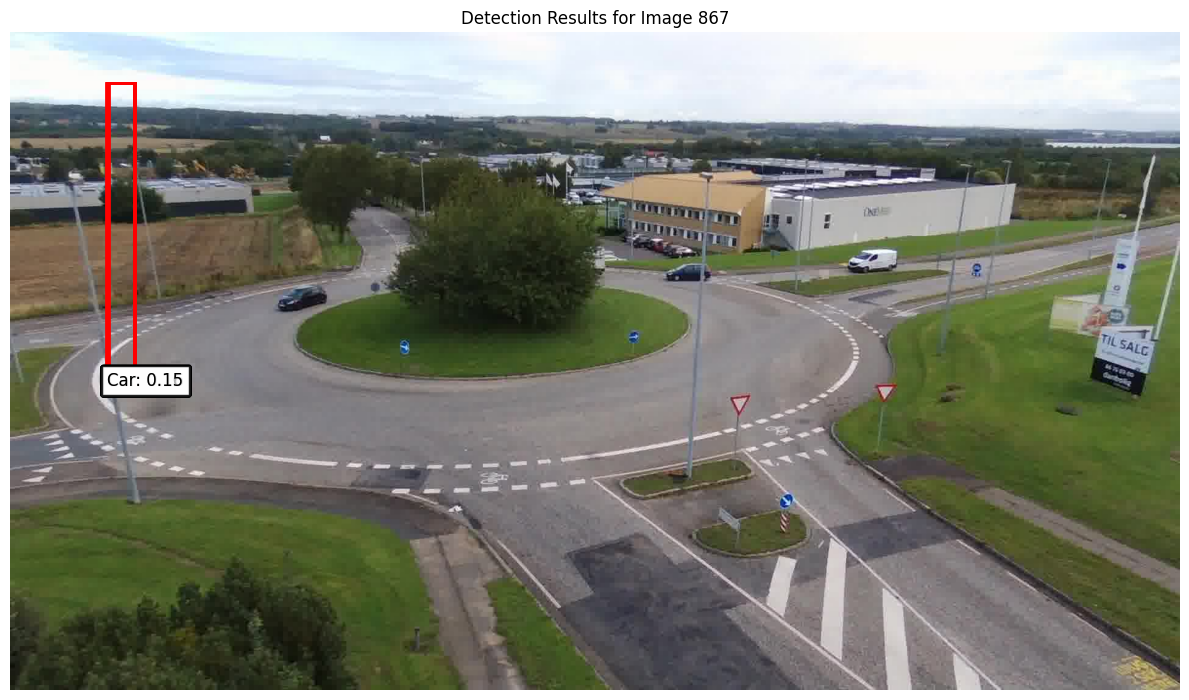

Detection results for Image 867:
  Car (0.16): [158.1988  589.7711  202.80402  84.07602]
  Car (0.15): [158.67427  590.576    203.17728   84.116356]
  Car (0.16): [157.9789  590.3721  202.89088  84.1097 ]
  Car (0.16): [159.40578 590.22644 203.36534  84.06618]
  Car (0.16): [160.66547  589.9948   203.76129   84.014275]
  Car (0.16): [159.94469 589.97406 203.4061   84.04538]
  Car (0.15): [159.16954 591.5827  203.634    84.16045]
  Car (0.16): [158.86604 590.24524 203.09886  84.08622]
  Car (0.15): [158.9451  590.52747 203.26472  84.08781]
  Car (0.16): [160.35289  589.5041   203.46754   84.011314]
  Car (0.15): [158.58649 590.7672  203.18466  84.10249]
  Car (0.15): [159.15707 591.167   203.50787  84.12022]
  Car (0.16): [158.16914  590.2978   202.91104   84.108406]
  Car (0.16): [160.25217 589.61804 203.44771  84.03804]
  Car (0.15): [158.20204 591.2775  203.18277  84.13527]
  Car (0.16): [159.99997  590.6135   203.65623   84.074715]
  Car (0.15): [158.78932 591.6881  203.49104  84.16

(<PIL.Image.Image image mode=RGB size=1920x1080>,
 array([[158.1988  , 589.7711  , 202.80402 ,  84.07602 ],
        [158.67427 , 590.576   , 203.17728 ,  84.116356],
        [157.9789  , 590.3721  , 202.89088 ,  84.1097  ],
        [159.40578 , 590.22644 , 203.36534 ,  84.06618 ],
        [160.66547 , 589.9948  , 203.76129 ,  84.014275],
        [159.94469 , 589.97406 , 203.4061  ,  84.04538 ],
        [159.16954 , 591.5827  , 203.634   ,  84.16045 ],
        [158.86604 , 590.24524 , 203.09886 ,  84.08622 ],
        [158.9451  , 590.52747 , 203.26472 ,  84.08781 ],
        [160.35289 , 589.5041  , 203.46754 ,  84.011314],
        [158.58649 , 590.7672  , 203.18466 ,  84.10249 ],
        [159.15707 , 591.167   , 203.50787 ,  84.12022 ],
        [158.16914 , 590.2978  , 202.91104 ,  84.108406],
        [160.25217 , 589.61804 , 203.44771 ,  84.03804 ],
        [158.20204 , 591.2775  , 203.18277 ,  84.13527 ],
        [159.99997 , 590.6135  , 203.65623 ,  84.074715],
        [158.78932 , 5

In [28]:
sample_idx = None
visualize_detection_example(model, dataset['test'], idx=sample_idx, threshold=0.1)

## Eval

In [45]:
def custom_evaluate_model_2(model, dataset, batch_size=4, iou_threshold=0.3):
    model.eval()
    device = next(model.parameters()).device
    print(f"model device: {device}")

    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=False
    )

    all_preds = []
    all_targets = []

    print(f"Running evaluation on {len(dataset)} samples in {len(dataloader)} batches")
    print(f"Using IoU threshold: {iou_threshold}")

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(dataloader, desc="Evaluating")):
            pixel_values = batch["pixel_values"].to(device)
            pixel_mask = batch["pixel_mask"].to(device) if "pixel_mask" in batch else None
            labels = batch["labels"]

            # forward
            outputs = model(
                pixel_values=pixel_values,
                pixel_mask=pixel_mask
            )

            # get preds.
            scores = outputs.logits
            pred_boxes = outputs.pred_boxes


            for i, label in enumerate(labels):
                try:
                    if torch.is_tensor(label['orig_size']):
                        width, height = label['orig_size'][0].item(), label['orig_size'][1].item()
                    else:
                        width, height = label['orig_size'][0], label['orig_size'][1]


                    pred_scores = scores[i][:, :-1]
                    pred_scores = softmax(pred_scores, dim=1)

                    max_scores, pred_classes = torch.max(pred_scores, dim=1)

                    score_threshold = 0.05  # low threshold to keep more predictions
                    valid_indices = max_scores > score_threshold

                    # if no predictions pass threshold, take top k
                    if valid_indices.sum() == 0:
                        k = min(20, len(max_scores))
                        top_indices = torch.topk(max_scores, k).indices
                        valid_indices = torch.zeros_like(max_scores, dtype=torch.bool)
                        valid_indices[top_indices] = True

                    # Get valid boxes, scores and classes
                    valid_boxes = pred_boxes[i][valid_indices]
                    valid_scores = max_scores[valid_indices]
                    valid_classes = pred_classes[valid_indices]

                    # convert normalized boxes (0-1) to absolute pixel coordinates
                    pixel_valid_boxes = torch.zeros_like(valid_boxes)
                    pixel_valid_boxes[:, 0] = valid_boxes[:, 0] * width  # x_min
                    pixel_valid_boxes[:, 1] = valid_boxes[:, 1] * height # y_min
                    pixel_valid_boxes[:, 2] = valid_boxes[:, 2] * width  # x_max
                    pixel_valid_boxes[:, 3] = valid_boxes[:, 3] * height # y_max

                    # fix invalid boxes
                    for j in range(pixel_valid_boxes.size(0)):
                        if pixel_valid_boxes[j, 0] >= pixel_valid_boxes[j, 2]:
                            pixel_valid_boxes[j, 2] = pixel_valid_boxes[j, 0] + 10
                        if pixel_valid_boxes[j, 1] >= pixel_valid_boxes[j, 3]:
                            pixel_valid_boxes[j, 3] = pixel_valid_boxes[j, 1] + 10

                        if torch.isnan(pixel_valid_boxes[j]).any():
                            pixel_valid_boxes[j] = torch.tensor([0, 0, 10, 10], dtype=pixel_valid_boxes.dtype, device=device)

                    target_boxes = label["boxes"].to(device)
                    target_labels = label["class_labels"].to(device)

                    # check normalzaiton
                    pixel_target_boxes = torch.zeros_like(target_boxes)
                    if target_boxes.numel() > 0:
                        if target_boxes.max() <= 1.0:  # if normalized
                            pixel_target_boxes[:, 0] = target_boxes[:, 0] * width
                            pixel_target_boxes[:, 1] = target_boxes[:, 1] * height
                            pixel_target_boxes[:, 2] = target_boxes[:, 2] * width
                            pixel_target_boxes[:, 3] = target_boxes[:, 3] * height
                        else:
                            pixel_target_boxes = target_boxes


                    all_preds.append({
                        "boxes": pixel_valid_boxes.to(device),
                        "scores": valid_scores.to(device),
                        "labels": valid_classes.to(device),
                    })

                    all_targets.append({
                        "boxes": pixel_target_boxes.to(device),
                        "labels": target_labels.to(device),
                    })

                except Exception as e:
                    print(f"Error processing sample {i} in batch {batch_idx}: {e}")
                    continue

    print(f"Collected {len(all_preds)} predictions and {len(all_targets)} targets")


    if len(all_preds) == 0 or len(all_targets) == 0:
        print("No valid predictions or targets for evaluation.")
        return {"map": 0.0}


    try:
        cpu_preds = []
        cpu_targets = []

        for pred in all_preds:
            cpu_preds.append({
                "boxes": pred["boxes"].cpu(),
                "scores": pred["scores"].cpu(),
                "labels": pred["labels"].cpu()
            })

        for target in all_targets:
            cpu_targets.append({
                "boxes": target["boxes"].cpu(),
                "labels": target["labels"].cpu()
            })

        metric = MeanAveragePrecision(
            box_format='xyxy',
            class_metrics=True,
            iou_thresholds=[iou_threshold]
        )


        metric.update(preds=cpu_preds, target=cpu_targets)
        metrics = metric.compute()

        result_metrics = {}
        result_metrics["map"] = metrics["map"].item()


        if "classes" in metrics:
            classes = metrics.pop("classes")
            map_per_class = metrics.pop("map_per_class")
            mar_100_per_class = metrics.pop("mar_100_per_class")

            for class_id, class_map, class_mar in zip(classes, map_per_class, mar_100_per_class):
                class_id_val = class_id.item()
                class_name = id2label[class_id_val] if class_id_val in id2label else f"class_{class_id_val}"
                result_metrics[f"map_{class_name}"] = class_map.item()
                result_metrics[f"mar_100_{class_name}"] = class_mar.item()

        for k, v in metrics.items():
            if k not in result_metrics and hasattr(v, 'item'):
                result_metrics[k] = v.item()

        return result_metrics

    except Exception as e:
        print(f"Error computing metrics: {e}")
        import traceback
        traceback.print_exc()
        return {"map": 0.0}




def compute_per_class_statistics_fixed(model, dataset, batch_size=4):
    model.eval()
    device = next(model.parameters()).device

    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=False
    )

    class_counts = {class_id: 0 for class_id in id2label.keys()}
    class_detections = {class_id: 0 for class_id in id2label.keys()}

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Computing statistics"):
            pixel_values = batch["pixel_values"].to(device)
            pixel_mask = batch["pixel_mask"].to(device) if "pixel_mask" in batch else None
            labels = batch["labels"]

            outputs = model(
                pixel_values=pixel_values,
                pixel_mask=pixel_mask
            )


            for i, label in enumerate(labels):
                try:
                    for class_label in label["class_labels"]:
                        class_id = class_label.item()
                        class_counts[class_id] += 1

                    pred_scores = outputs.logits[i][:, :-1]  # exclude no-object class
                    pred_scores = softmax(pred_scores, dim=1)
                    max_scores, pred_classes = torch.max(pred_scores, dim=1)

                    for j, (score, class_id) in enumerate(zip(max_scores, pred_classes)):
                        if score > 0.1:
                            class_detections[class_id.item()] += 1

                except Exception as e:
                    continue

    print("\nClass-wise Statistics:")
    print(f"{'Class':<15} {'GT Count':<10} {'Detections':<15} {'Ratio':<10}")
    print("-" * 50)

    for class_id, count in class_counts.items():
        class_name = id2label[class_id]
        detections = class_detections[class_id]
        ratio = detections / max(1, count)
        print(f"{class_name:<15} {count:<10} {detections:<15} {ratio:.4f}")

    return class_counts, class_detections

In [ ]:
def diagnose_predictions(model, dataset, num_samples=3, batch_size=1):
    model.eval()
    device = next(model.parameters()).device

    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=True
    )

    samples_analyzed = 0

    with torch.no_grad():
        for batch in dataloader:
            if samples_analyzed >= num_samples:
                break

            pixel_values = batch["pixel_values"].to(device)
            pixel_mask = batch["pixel_mask"].to(device) if "pixel_mask" in batch else None
            labels = batch["labels"]

            # get preds.
            outputs = model(
                pixel_values=pixel_values,
                pixel_mask=pixel_mask
            )



            for i in range(min(batch_size, len(labels))):
                try:
                    samples_analyzed += 1
                    if samples_analyzed > num_samples:
                        break

                    if torch.is_tensor(labels[i]['orig_size']):
                        width, height = labels[i]['orig_size'][0].item(), labels[i]['orig_size'][1].item()
                    else:
                        width, height = labels[i]['orig_size'][0], labels[i]['orig_size'][1]


                    pred_scores = outputs.logits[i]
                    pred_boxes = outputs.pred_boxes[i]


                    print("\n===== SAMPLE", samples_analyzed, "=====")
                    print(f"Image size: {width}x{height}")

                    gt_boxes = labels[i]["boxes"]
                    gt_labels = labels[i]["class_labels"]


                    print(f"Ground truth: {len(gt_boxes)} boxes")
                    print("Ground truth boxes (normalized format):")
                    for j in range(min(3, len(gt_boxes))):
                        box = gt_boxes[j]
                        label_id = gt_labels[j].item()
                        label_name = id2label[label_id]
                        print(f"  GT Box {j}: {box.tolist()} | Class: {label_name} ({label_id})")


                    print("Ground truth boxes (pixel coordinates):")
                    for j in range(min(3, len(gt_boxes))):
                        box = gt_boxes[j].tolist()
                        if max(box) <= 1.0:
                            pixel_box = [
                                box[0] * width,
                                box[1] * height,
                                box[2] * width,
                                box[3] * height
                            ]
                        else:
                            pixel_box = box

                        label_id = gt_labels[j].item()
                        label_name = id2label[label_id]
                        print(f"  GT Box {j}: {pixel_box} | Class: {label_name} ({label_id})")


                    pred_class_scores = pred_scores[:, :-1]
                    pred_class_scores = softmax(pred_class_scores, dim=1)
                    max_scores, pred_classes = torch.max(pred_class_scores, dim=1)


                    sorted_indices = torch.argsort(max_scores, descending=True)
                    print(f"Top predictions (normalized coordinates):")
                    for j in range(min(5, len(sorted_indices))):
                        idx = sorted_indices[j].item()
                        box = pred_boxes[idx].tolist()
                        score = max_scores[idx].item()
                        pred_class = pred_classes[idx].item()
                        class_name = id2label[pred_class]

                        print(f"  Pred {j}: {box} | Class: {class_name} ({pred_class}) | Score: {score:.4f}")

                    print(f"Top predictions (pixel coordinates):")
                    for j in range(min(5, len(sorted_indices))):
                        idx = sorted_indices[j].item()
                        box = pred_boxes[idx].tolist()

                        pixel_box = [
                            box[0] * width,
                            box[1] * height,
                            box[2] * width,
                            box[3] * height
                        ]

                        score = max_scores[idx].item()
                        pred_class = pred_classes[idx].item()
                        class_name = id2label[pred_class]

                        print(f"  Pred {j}: {pixel_box} | Class: {class_name} ({pred_class}) | Score: {score:.4f}")

                except Exception as e:
                    print(f"Error analyzing sample: {e}")
                    import traceback
                    traceback.print_exc()

In [55]:
val_metrics = custom_evaluate_model_2(
    model,
    val_dataset_transformed,
    iou_threshold=0.05  # More lenient IoU threshold
)
print("Validation metrics:", val_metrics)

Model is on device: cuda:0
Running evaluation on 164 samples in 41 batches
Using IoU threshold: 0.05


Evaluating:   0%|          | 0/41 [00:00<?, ?it/s]

Collected 164 predictions and 164 targets
Validation metrics: {'map': 0.0, 'map_Human': 0.0, 'mar_100_Human': 0.0, 'map_Car': 0.0, 'mar_100_Car': 0.0, 'map_Truck': 0.0, 'mar_100_Truck': 0.0, 'map_Van': 0.0, 'mar_100_Van': 0.0, 'map_Motorcycle': 0.0, 'mar_100_Motorcycle': 0.0, 'map_Bicycle': 0.0, 'mar_100_Bicycle': 0.0, 'map_Bus': -1.0, 'mar_100_Bus': -1.0, 'map_Trailer': 0.0, 'mar_100_Trailer': 0.0, 'map_50': -1.0, 'map_75': -1.0, 'map_small': 0.0, 'map_medium': 0.0, 'map_large': 0.0, 'mar_1': 0.0, 'mar_10': 0.0, 'mar_100': 0.0, 'mar_small': 0.0, 'mar_medium': 0.0, 'mar_large': 0.0}


In [53]:
class_counts, class_detections = compute_per_class_statistics_fixed(model, val_dataset_transformed)

Computing statistics:   0%|          | 0/41 [00:00<?, ?it/s]


Class-wise Statistics:
Class           GT Count   Detections      Ratio     
--------------------------------------------------
Human           27         0               0.0000
Car             445        16288           36.6022
Truck           42         112             2.6667
Van             61         0               0.0000
Motorcycle      1          0               0.0000
Bicycle         3          0               0.0000
Bus             2          0               0.0000
Trailer         17         0               0.0000


In [54]:
diagnose_predictions(model, val_dataset_transformed, num_samples=3)


===== SAMPLE 1 =====
Image size: 400x400
Ground truth: 1 boxes
Ground truth boxes (normalized format):
  GT Box 0: [0.9591146111488342, 0.39510414004325867, 0.01822921819984913, 0.011458320543169975] | Class: Car (1)
Ground truth boxes (pixel coordinates):
  GT Box 0: [383.6458444595337, 158.04165601730347, 7.2916872799396515, 4.58332821726799] | Class: Car (1)
Top predictions (normalized coordinates):
  Pred 0: [0.46123751997947693, 0.36266374588012695, 0.030933650210499763, 0.02283289097249508] | Class: Car (1) | Score: 0.9113
  Pred 1: [0.4565834105014801, 0.3605542480945587, 0.033053867518901825, 0.02499481849372387] | Class: Car (1) | Score: 0.9081
  Pred 2: [0.4606430232524872, 0.3564046025276184, 0.034859076142311096, 0.026602495461702347] | Class: Car (1) | Score: 0.9042
  Pred 3: [0.5958269238471985, 0.4110739529132843, 0.03624837100505829, 0.023694930598139763] | Class: Car (1) | Score: 0.9009
  Pred 4: [0.5727269649505615, 0.41054514050483704, 0.03964115306735039, 0.0270169

In [16]:
print("Saving model...")
trainer.save_model(output_dir)
image_processor.save_pretrained(output_dir)

Saving model...


['detr-resnet-50-dc5-auair-finetuned/preprocessor_config.json']

In [43]:
baseline_map = {
    "YOLOV3-Tiny": 30.22,
    "MobileNetV2-SSDLite": 19.50
}

detr_map = test_metrics.get("map", 0.0)

print("\nModel mAP Comparison:")
print(f"YOLOV3-Tiny: {baseline_map['YOLOV3-Tiny']:.2f}")
print(f"MobileNetV2-SSDLite: {baseline_map['MobileNetV2-SSDLite']:.2f}")
print(f"DETR-ResNet-50-DC5 (Ours): {detr_map:.2f}")

print("\nClass-wise Results for DETR:")
for k, v in test_metrics.items():
    if k.startswith("map_"):
        print(f"{k[4:]}: {v:.4f}")


test_results = {
    "mAP": detr_map,
    "class_metrics": {k: v for k, v in test_metrics.items() if k.startswith("map_")},
    "baseline_comparison": {
        "YOLOV3-Tiny": baseline_map["YOLOV3-Tiny"],
        "MobileNetV2-SSDLite": baseline_map["MobileNetV2-SSDLite"],
        "DETR-ResNet-50-DC5": detr_map
    }
}

import json
with open(os.path.join(output_dir, "test_results.json"), "w") as f:
    json.dump(test_results, f, indent=2)


wandb.finish()


Model mAP Comparison:
YOLOV3-Tiny: 30.22
MobileNetV2-SSDLite: 19.50
DETR-ResNet-50-DC5 (Ours): 0.00

Class-wise Results for DETR:
Human: 0.0000
Car: 0.0000
Truck: 0.0000
Van: 0.0000
Bicycle: 0.0000
Bus: 0.0000
Trailer: 0.0000
50: 0.0000
75: 0.0000
small: 0.0000
medium: 0.0000
large: 0.0000


Training and evaluation complete!
